## LoopDetect - Python

Testing in Python 3.12 environment

In [1]:
# Import LoopDetect core and numpy
import numpy as np
import loopdetect.core as ld
import loopdetect.examples as lde
import numdifftools

from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

d:\Work\StudentJob\Jana Wolf\LoopDetect_2025\env\lib\loopdetect_python_3.12\Lib\site-packages\loopdetect\examples.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
# An example ODE system with function func_POSm4 is provided in
# loopdetect.examples, it has 4 variables.
# Variable values for the 4 variables (as tuple, cast into a list)
s_star = [(1,1,1,1)]
# Define further arguments of func_POSm4
klin = np.ones((8,))
knonlin = (2.5,3)
# compute loops
res_tab = ld.find_loops_vset(lde.func_POSm4,vset=s_star,klin=klin,
                   knonlin=knonlin,max_num_loops=10)
# The loop list, a pandas dataframe, is accessed like this:
res_tab['loop_rep'][0]

,loop,length,sign
0,"(0, 1, 2, 3, 0)",4,-1
1,"(1, 2, 3, 1)",3,1
2,"(0, 0)",1,-1
3,"(1, 1)",1,-1
4,"(2, 2)",1,-1
5,"(3, 3)",1,-1


In [3]:
print(res_tab['loop_rep'][0])

              loop  length  sign
0  (0, 1, 2, 3, 0)       4    -1
1     (1, 2, 3, 1)       3     1
2           (0, 0)       1    -1
3           (1, 1)       1    -1
4           (2, 2)       1    -1
5           (3, 3)       1    -1


##### **Note**:
- The `lde.func_POSm4` is a network consists of 4 nodes, describe by 4 differential equations
- Detaid:

```
def func_POSm4(x,klin,knonlin):
    ...
    dx = np.zeros(4)
    dx[0] = klin[0]-(klin[1]*(1 + x[3]/pow(knonlin[0],knonlin[1])) + klin[2])*x[0]
    dx[1] = klin[1]*(1 + x[3]/pow(knonlin[0],knonlin[1]))*x[0] - (klin[3] + klin[4])*x[1]
    dx[2] = klin[3]*x[1] - (klin[5] + klin[6])*x[2]
    dx[3] = klin[5]*x[2] - klin[7]*x[3]
    return(dx)
```

In [89]:
help(pow)

Help on built-in function pow in module builtins:

pow(base, exp, mod=None)
    Equivalent to base**exp with 2 arguments or base**exp % mod with 3 arguments

    Some types, such as ints, are able to use a more efficient algorithm when
    invoked using the three argument form.



In [90]:
def func_POSm4_fix(x, klin, knonlin):
    fb = 1 + (x[3] / knonlin[0])**knonlin[1]
    dx = np.zeros(4)
    dx[0] = klin[0] - klin[1] * x[0] * fb - klin[2] * x[0]
    dx[1] = klin[1] * x[0] * fb - klin[3] * x[1] - klin[4] * x[1]
    dx[2] = klin[3] * x[1] - klin[5] * x[2] - klin[6] * x[2]
    dx[3] = klin[5] * x[2] - klin[7] * x[3]
    return dx

def solve_POSm4(initial_conditions, time_points, klin, knonlin):
    def model(x, t):
        return func_POSm4_fix(x, klin, knonlin)
    sol = odeint(model, initial_conditions, time_points)
    return sol

In [91]:
res_tab = ld.find_loops_vset(func_POSm4_fix,vset=s_star,klin=klin,
                   knonlin=knonlin,max_num_loops=10)
# The loop list, a pandas dataframe, is accessed like this:
res_tab['loop_rep'][0]

,loop,length,sign
0,"(0, 1, 2, 3, 0)",4,-1
1,"(1, 2, 3, 1)",3,1
2,"(0, 0)",1,-1
3,"(1, 1)",1,-1
4,"(2, 2)",1,-1
5,"(3, 3)",1,-1


In [92]:
# Variable values for the 2 variables (as tuple, cast into a list)
s_star_new = [(2, 3)]
# Define further arguments of func_newmodel
args_new = (1.0, 0.5) # a=1.0, b=0.5
# compute loops for the new model
res_tab_new = ld.find_loops_vset(func_newmodel, vset=s_star_new,
                                 a=args_new[0], b=args_new[1],
                                 max_num_loops=10)
# The loop list, a pandas dataframe, is accessed like this:
res_tab_new['loop_rep'][0]
# This is an example script showing how to use LoopDetect to find loops
# in ODE systems. It first uses an example model provided in LoopDetect,
# then defines a new model and uses LoopDetect on it.

,loop,length,sign
0,"(0, 1, 0)",2,-1
1,"(0, 0)",1,-1


In [8]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams.update({
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "mathtext.fontset": "cm",
    "text.usetex": True,  # requires LaTeX installation
    "axes.linewidth": 1.2,
    "axes.labelsize": 18,
    "axes.titlesize": 18,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "legend.fontsize": 14,
    "figure.dpi": 300,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.minor.visible": True,
    "ytick.minor.visible": True,
    "xtick.major.size": 6,
    "xtick.minor.size": 3,
    "ytick.major.size": 6,
    "ytick.minor.size": 3,
    "xtick.major.width": 1.0,
    "ytick.major.width": 1.0,
})

In [9]:
# colors = ["tab:blue", "tab:green", "tab:orange", "tab:red", "tab:purple", "black"]
# colors = plt.cm.viridis(np.linspace(0, 1, 6))
colors = ['#EE7733', '#0077BB', '#33BBEE', '#EE3377', '#CC3311', '#009988', '#BBBBBB']
# colors = ['#D46362','#BD353A', '#5E97D0', '#256FB0', '#F2B134', '#B27D2C', '#4EB265', '#2E8540']

In [95]:
colors[::2]

['#EE7733', '#33BBEE', '#CC3311', '#BBBBBB']

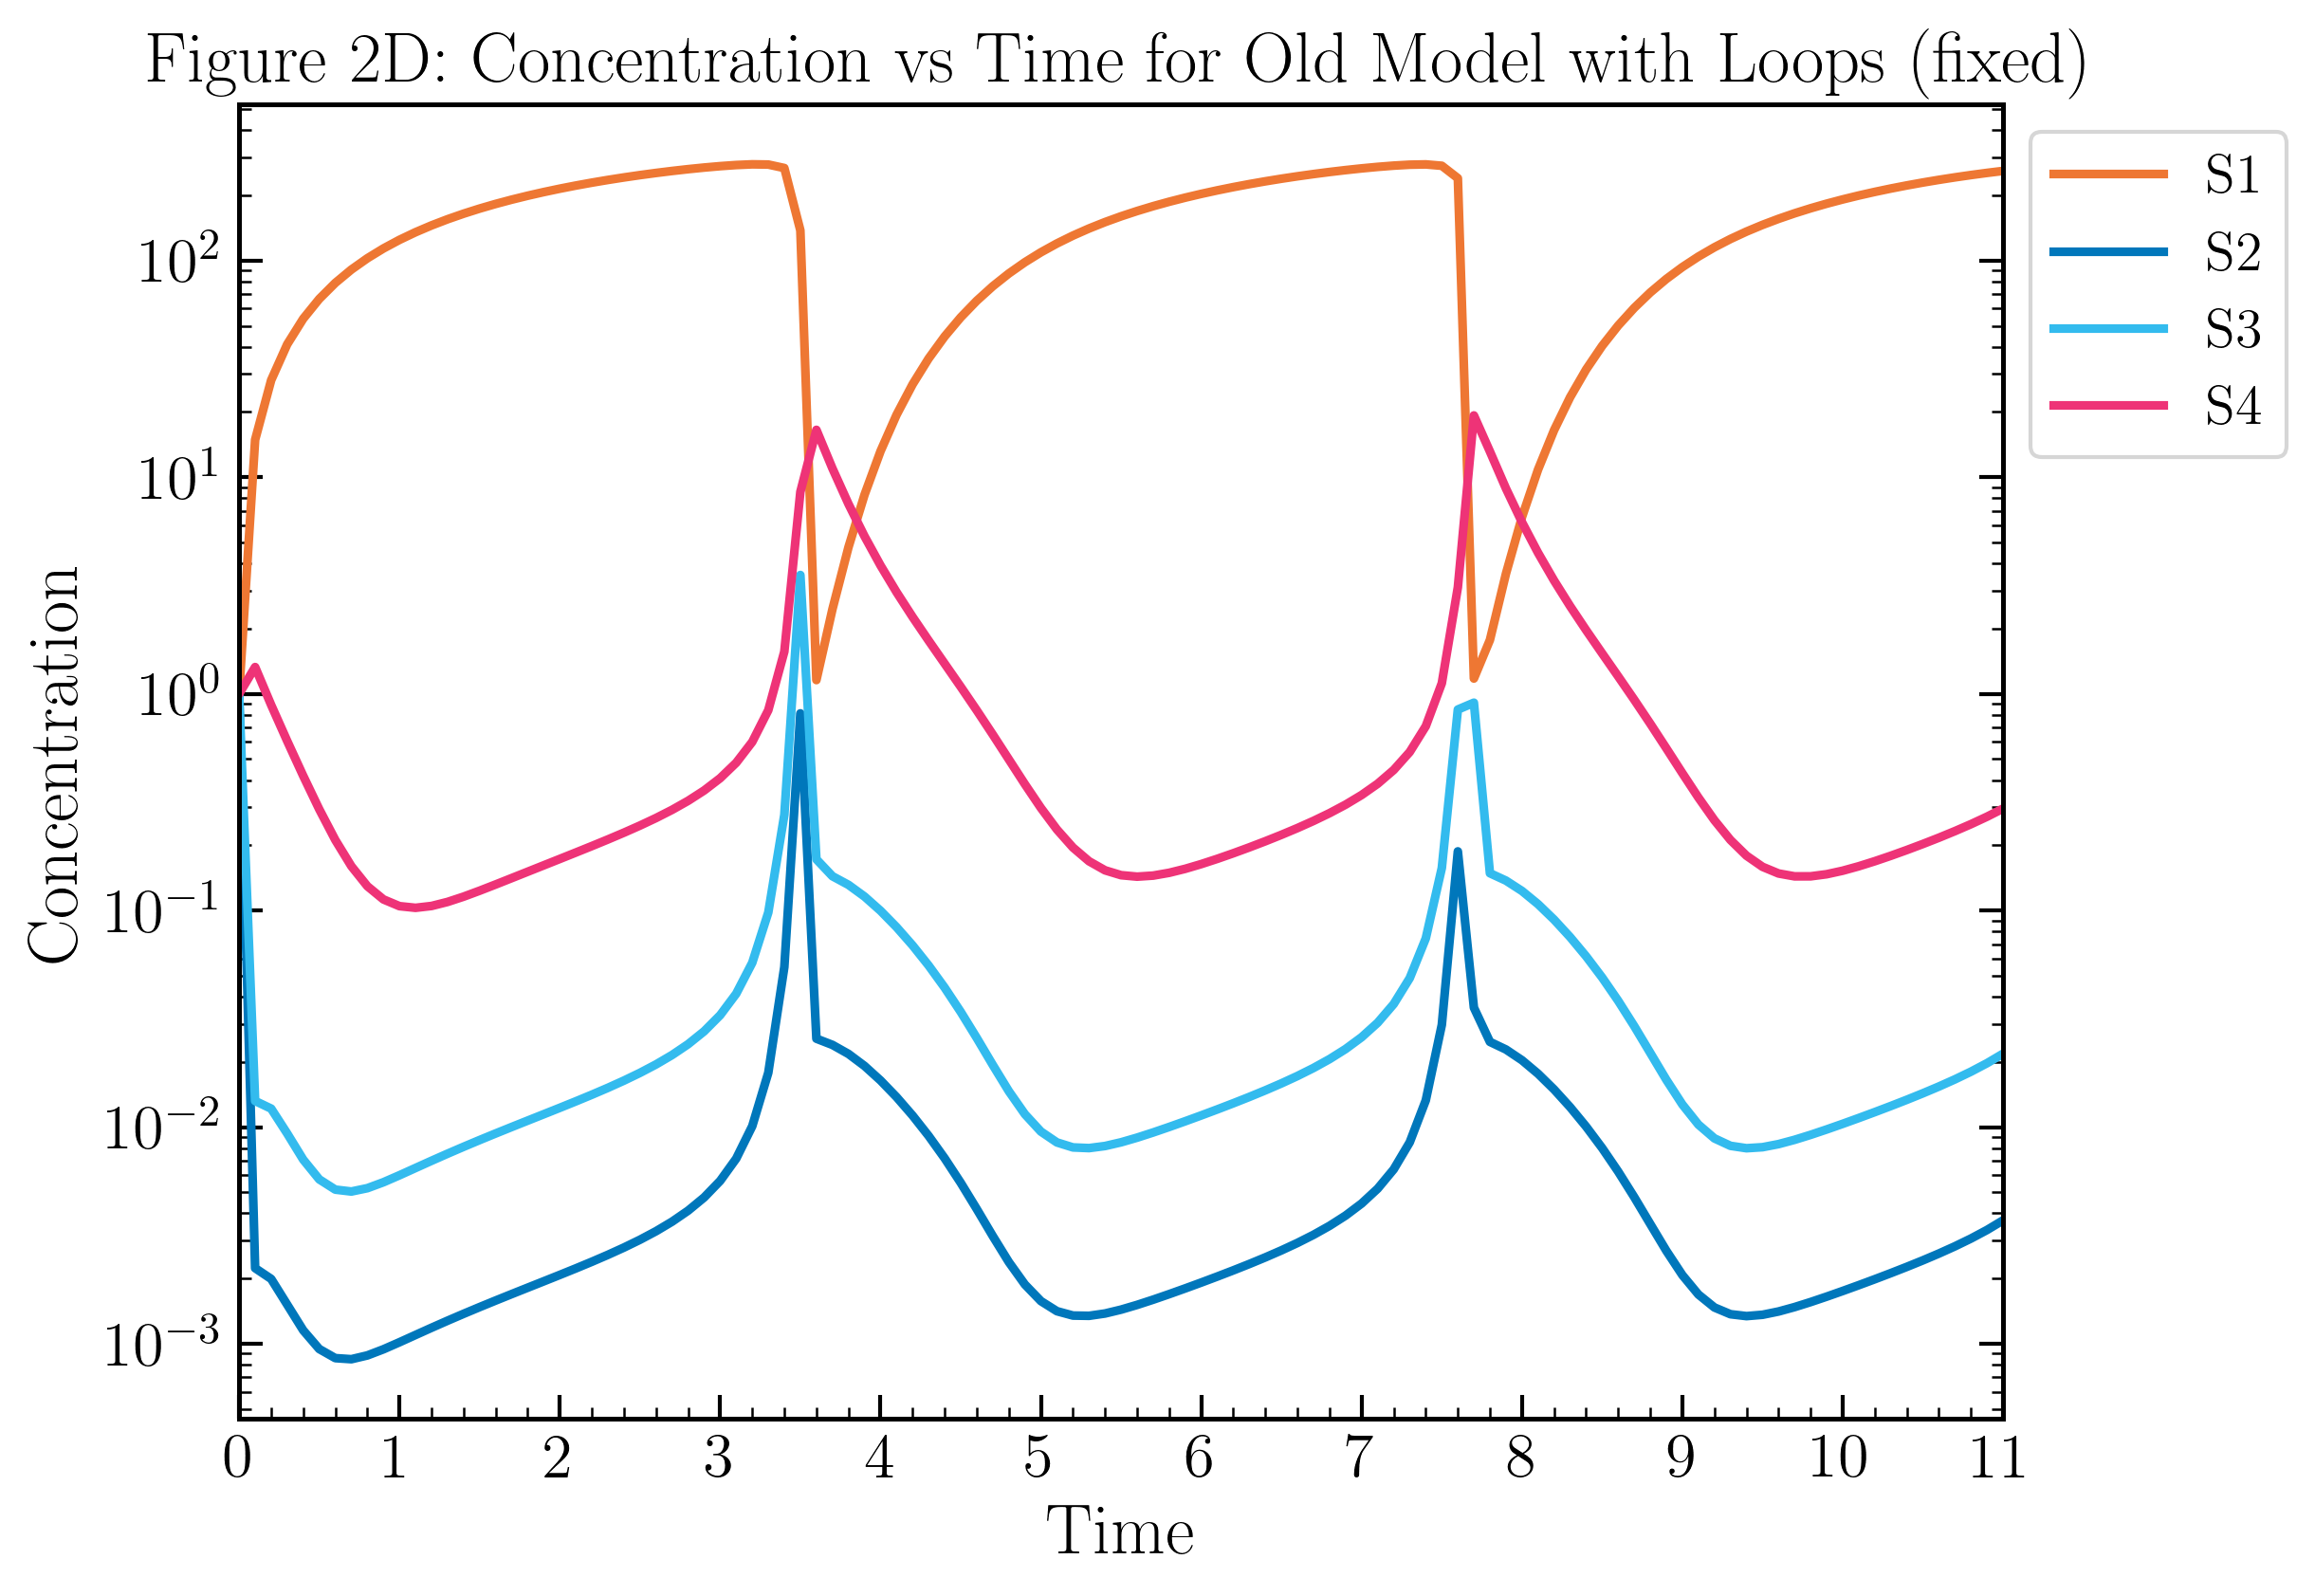

In [96]:
# Draw plot concentration vs time for the old model with loops

# klin = (165,0.044,0.27,550,5000,78,4.4,5.1)
# knonlin = (0.3,2)

klin = (150, 0.04, 0.3, 500, 5000, 80, 4, 5)
knonlin = (0.3, 2)

time_points = np.linspace(0, 11, 111)
# initial_conditions = [10**2, 10**(-2), 10**(-2), 10**(-1)]# s_star[0]
initial_conditions = s_star[0]
# initial_conditions = [1,2,3,4]# s_star[0]
sol = solve_POSm4(initial_conditions, time_points,
                        klin=klin, knonlin=knonlin)

plt.figure(figsize=(8, 6))
for i, c in enumerate(colors[:4]):
    plt.plot(time_points, sol[:, i], lw=2.2, color=c, label=f"S{i+1}")

# plt.plot(time_points, sol, label=['S1', 'S2', 'S3', 'S4'], color=colors[:4])
plt.xlabel('Time')
plt.xlim(0, 11)
plt.xticks(np.arange(0, 12, 1))
plt.ylabel('Concentration')
plt.gca().yaxis.set_ticks_position('both')
# plt.gca().yaxis.set_tick_params(direction='inout')
# Log scale for y-axis
plt.yscale('log')
plt.title('Figure 2D: Concentration vs Time for Old Model with Loops (fixed)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

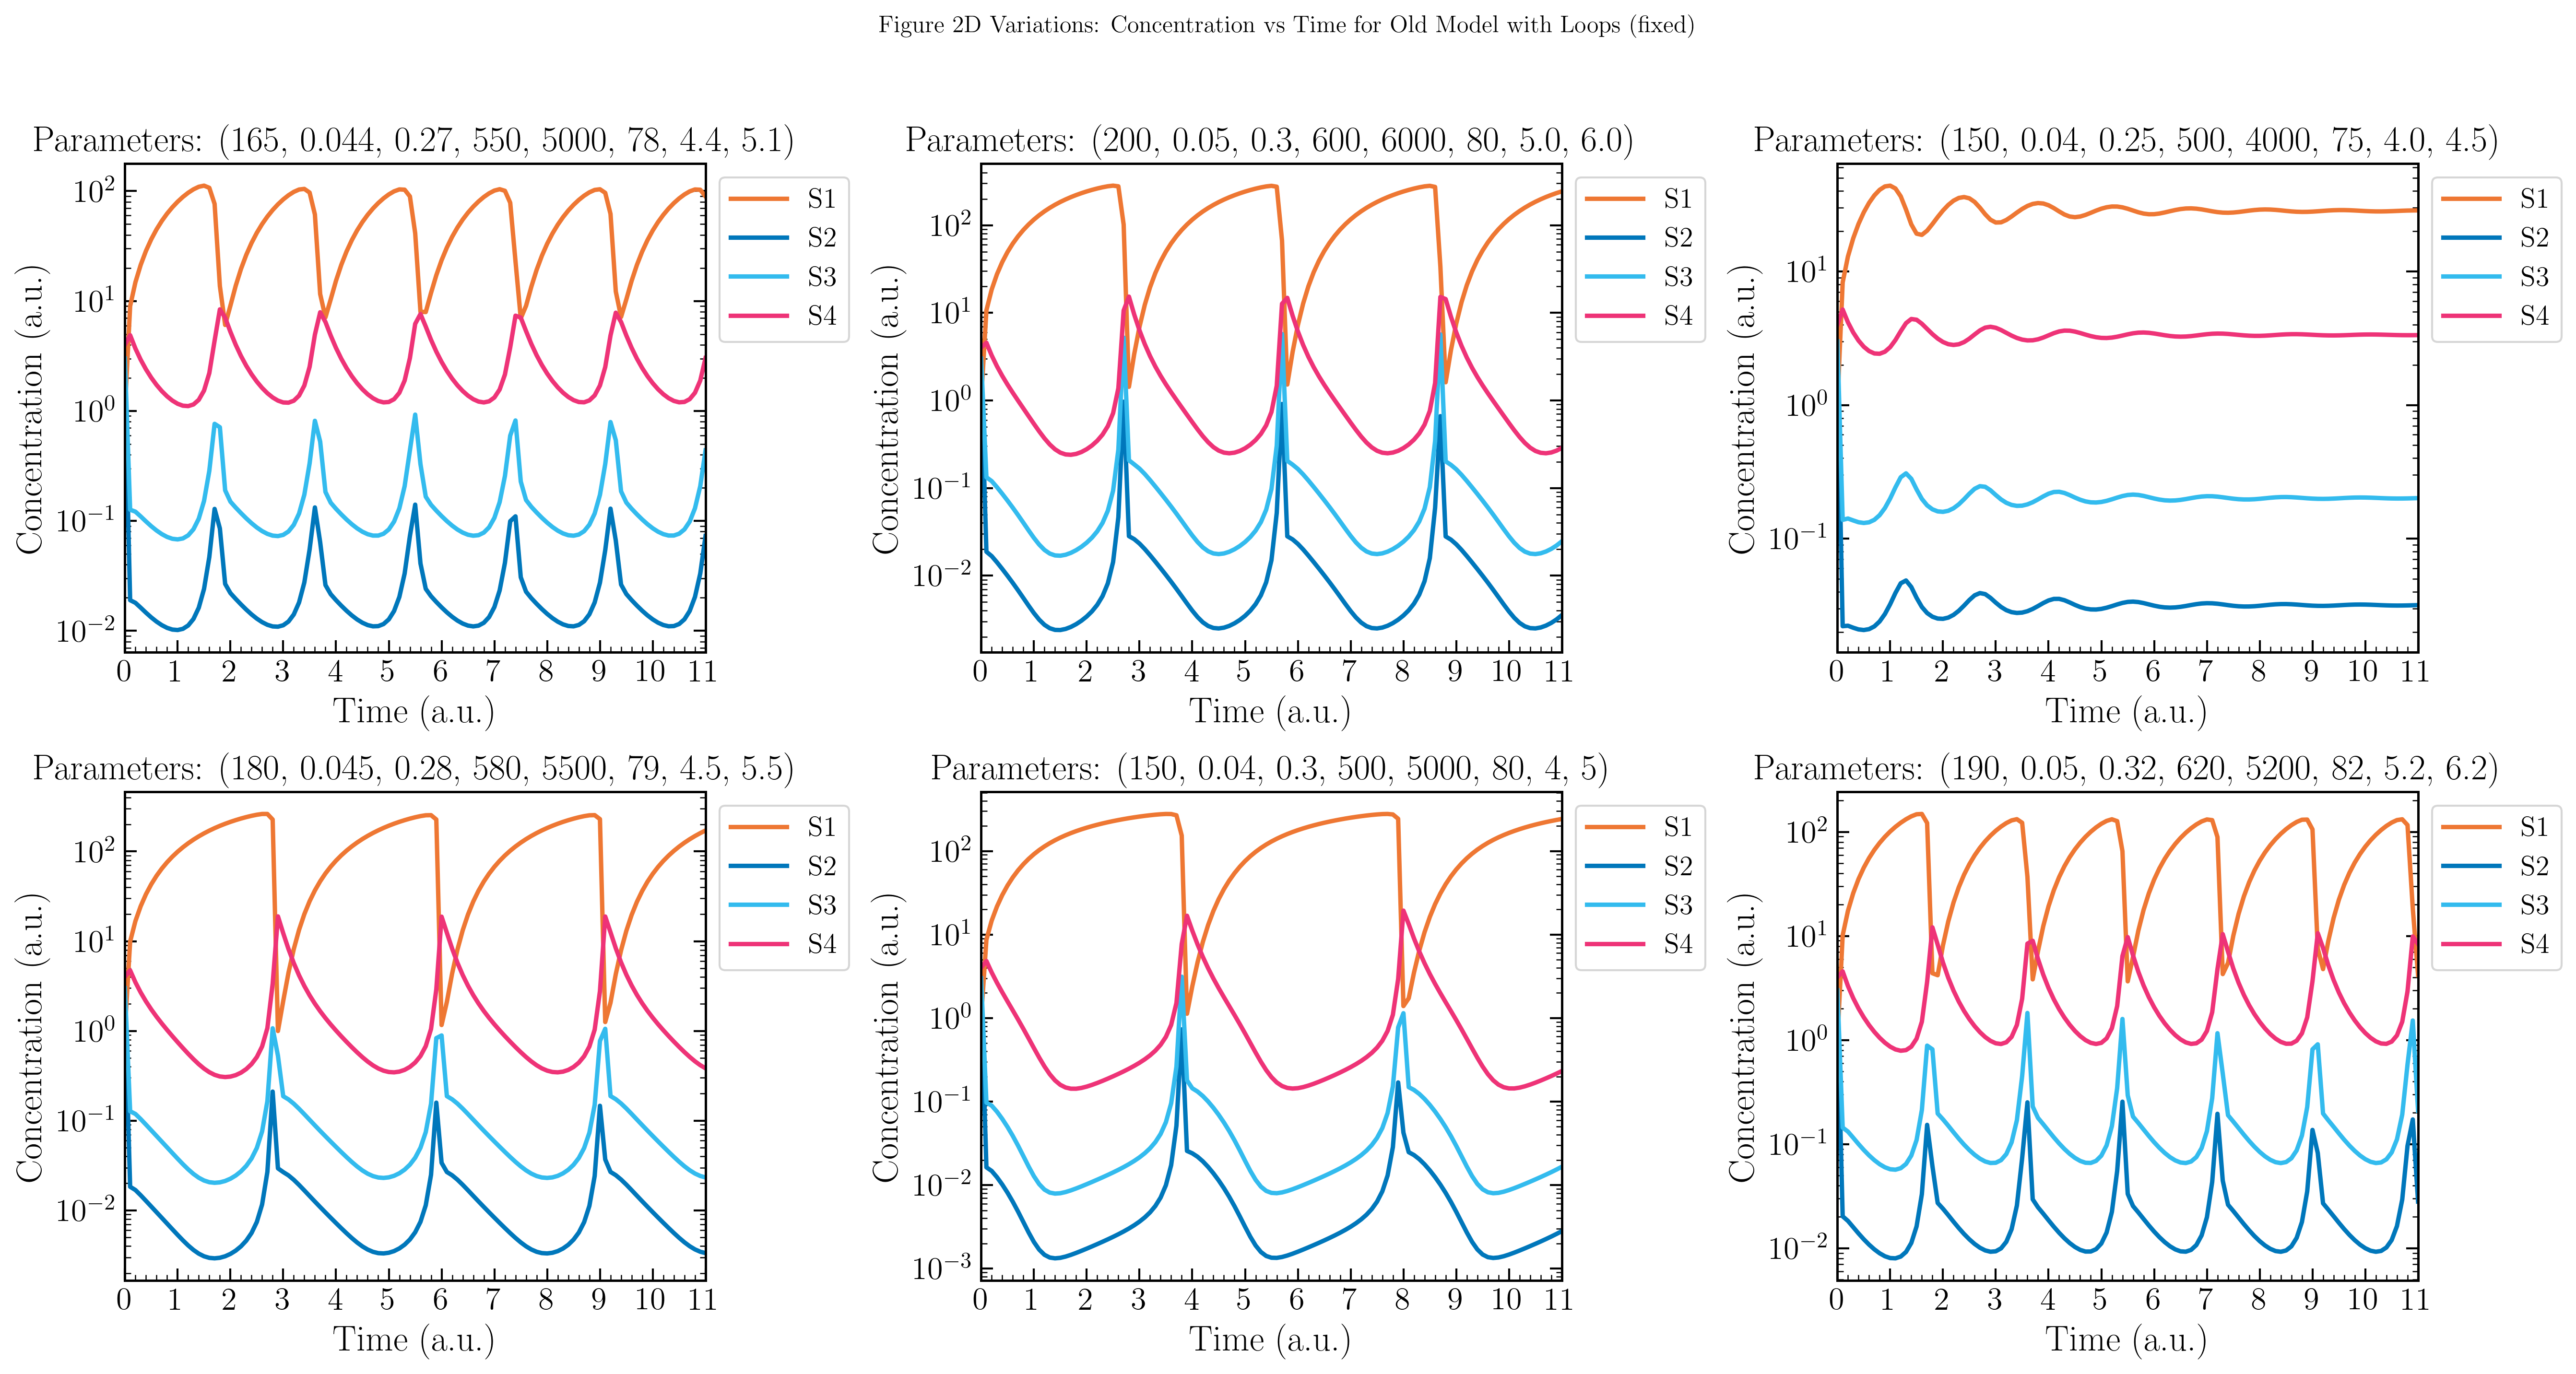

In [15]:
# Create 2x2 plots to try different parameters for the fixed model
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
param_sets = [
    (165, 0.044, 0.27, 550, 5000, 78, 4.4, 5.1),
    (200, 0.05, 0.3, 600, 6000, 80, 5.0, 6.0),
    (150, 0.04, 0.25, 500, 4000, 75, 4.0, 4.5),
    (180, 0.045, 0.28, 580, 5500, 79, 4.5, 5.5),
    (150, 0.04, 0.3, 500, 5000, 80, 4, 5),
    (190, 0.05, 0.32, 620, 5200, 82, 5.2, 6.2)
]
for ax, params in zip(axs.flatten(), param_sets):
    klin = params
    sol = solve_POSm4(initial_conditions, time_points,
                            klin=klin, knonlin=knonlin)
    for i, c in enumerate(colors[:4]):
        ax.plot(time_points, sol[:, i], lw=2.2, color=c, label=f"S{i+1}")
    # ax.plot(time_points, sol, label=['S1', 'S2', 'S3', 'S4'])
    ax.set_xlabel('Time (a.u.)', weight='bold')
    ax.set_xlim(0, 11)
    ax.set_xticks(np.arange(0, 12, 1))
    # Show tick marks in both left and right y-axes
    ax.yaxis.set_ticks_position('both')
    ax.set_ylabel('Concentration (a.u.)', weight='bold')
    ax.set_yscale('log')
    ax.set_title(f'Parameters: {params}')
    # Make legend outside the plot
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    # ax.legend()
plt.suptitle('Figure 2D Variations: Concentration vs Time for Old Model with Loops (fixed)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#Show in 300 dpi
plt.gcf().set_dpi(300)
plt.show()

d:\Work\StudentJob\Jana Wolf\LoopDetect_2025\env\lib\loopdetect_python_3.12\Lib\site-packages\loopdetect\examples.py:208: RuntimeWarning: overflow encountered in scalar multiply
  dx[0] = klin[0]-(klin[1]*(1 + x[3]/pow(knonlin[0],knonlin[1])) + klin[2])*x[0]
d:\Work\StudentJob\Jana Wolf\LoopDetect_2025\env\lib\loopdetect_python_3.12\Lib\site-packages\loopdetect\examples.py:209: RuntimeWarning: overflow encountered in scalar multiply
  dx[1] = klin[1]*(1 + x[3]/pow(knonlin[0],knonlin[1]))*x[0] - (klin[3] + klin[4])*x[1]
C:\Users\Admin\AppData\Local\Temp\ipykernel_27908\3659428777.py:16: RuntimeWarning: invalid value encountered in add
  X = X + dXdt * (time_points[1] - time_points[0])


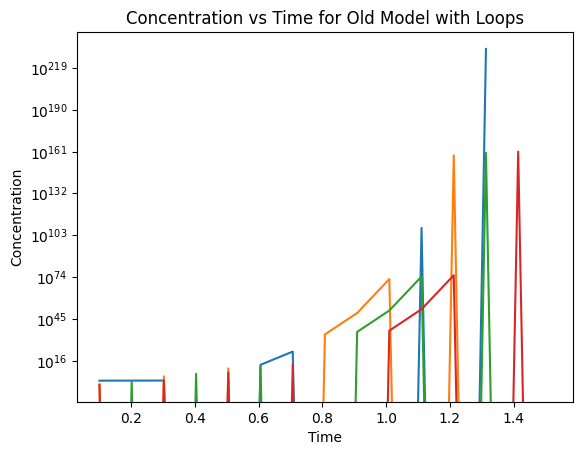

In [57]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
# Draw plot concentration vs time for the old model with loops

klin = (165,0.044,0.27,550,5000,78,4.4,5.1)
knonlin = (0.3,2)

time_points = np.linspace(0, 10, 100)
initial_conditions = [10**2, 10**(-3), 10**(-2), 10**(-1)]# s_star[0]

X = initial_conditions
sol = [None, None, None, None]

for t in time_points[:-1]:
    dXdt = lde.func_POSm4(X, klin, knonlin)
    X = X + dXdt * (time_points[1] - time_points[0])
    sol = np.vstack([sol, X]) if 'sol' in locals() else X
    
plt.plot(time_points, sol)
plt.xlabel('Time')
plt.ylabel('Concentration')
# Log scale for y-axis
plt.yscale('log')
plt.title('Concentration vs Time for Old Model with Loops')
# plt.gcf().set_dpi(300)
plt.show()

In [26]:
klin = (165,0.044,0.27,550,5000,78,4.4,5.1)
knonlin = (0.3,2)
# Define a helper function: odeint requires a function depending
# only on the variables (first argument) and the time, t, but
# func_POSm4 is independent from t and carries two more arguments
# (klin, knonlin).
def func_POSm4_help(x,t):
        return(lde.func_POSm4(x,klin,knonlin))
# Solve the system using odeint at time points 0, 1, ..., 100,
# initial vector: (1,2,3,4)
sol = odeint(func_POSm4_help, y0 = (1,2,3,4),
        t = np.linspace(0,100,11))
# We set the last point of the numeric solution as point of interest
s_star = sol[-1]

C:\Users\Admin\AppData\Local\Temp\ipykernel_27908\3783449936.py:11: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sol = odeint(func_POSm4_help, y0 = (1,2,3,4),


In [29]:
res_tab_2 = ld.find_loops_vset(lde.func_POSm4,vset=[s_star],
                   klin=klin, knonlin=knonlin,max_num_loops=10)
print(f"klin={klin}, knonlin={knonlin}")
res_tab_2['loop_rep'][0]

klin=(165, 0.044, 0.27, 550, 5000, 78, 4.4, 5.1), knonlin=(0.3, 2)


,loop,length,sign
0,"(0, 1, 2, 3, 0)",4,-1
1,"(1, 2, 3, 1)",3,1
2,"(0, 0)",1,-1
3,"(1, 1)",1,-1
4,"(2, 2)",1,-1
5,"(3, 3)",1,-1


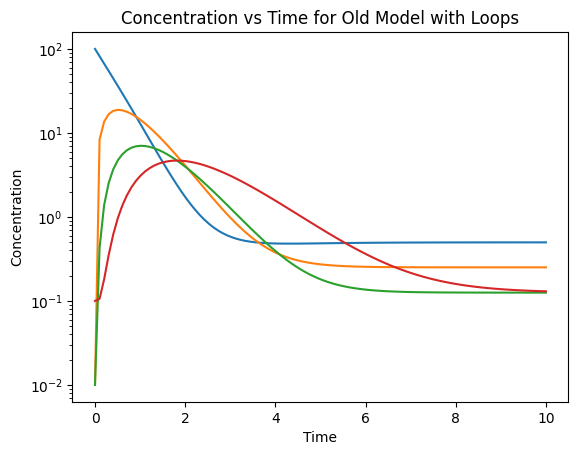

In [23]:
# Try solve_ivp instead of odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
# Draw plot concentration vs time for the old model with loops
def model_ivp(t, x, klin, knonlin):
    return lde.func_POSm4(x, klin, knonlin)
time_points = np.linspace(0, 10, 100)
initial_conditions = [10**2, 10**(-2), 10**(-2), 10**(-1)]# s_star[0]
sol_ivp = solve_ivp(model_ivp, [time_points[0], time_points[-1]], initial_conditions,
                    t_eval=time_points, args=(klin, knonlin), method='RK45', rtol=1e-6)
plt.plot(sol_ivp.t, sol_ivp.y.T)
plt.xlabel('Time')
plt.ylabel('Concentration')
# Log scale for y-axis
plt.yscale('log')
plt.title('Concentration vs Time for Old Model with Loops')
plt.show()

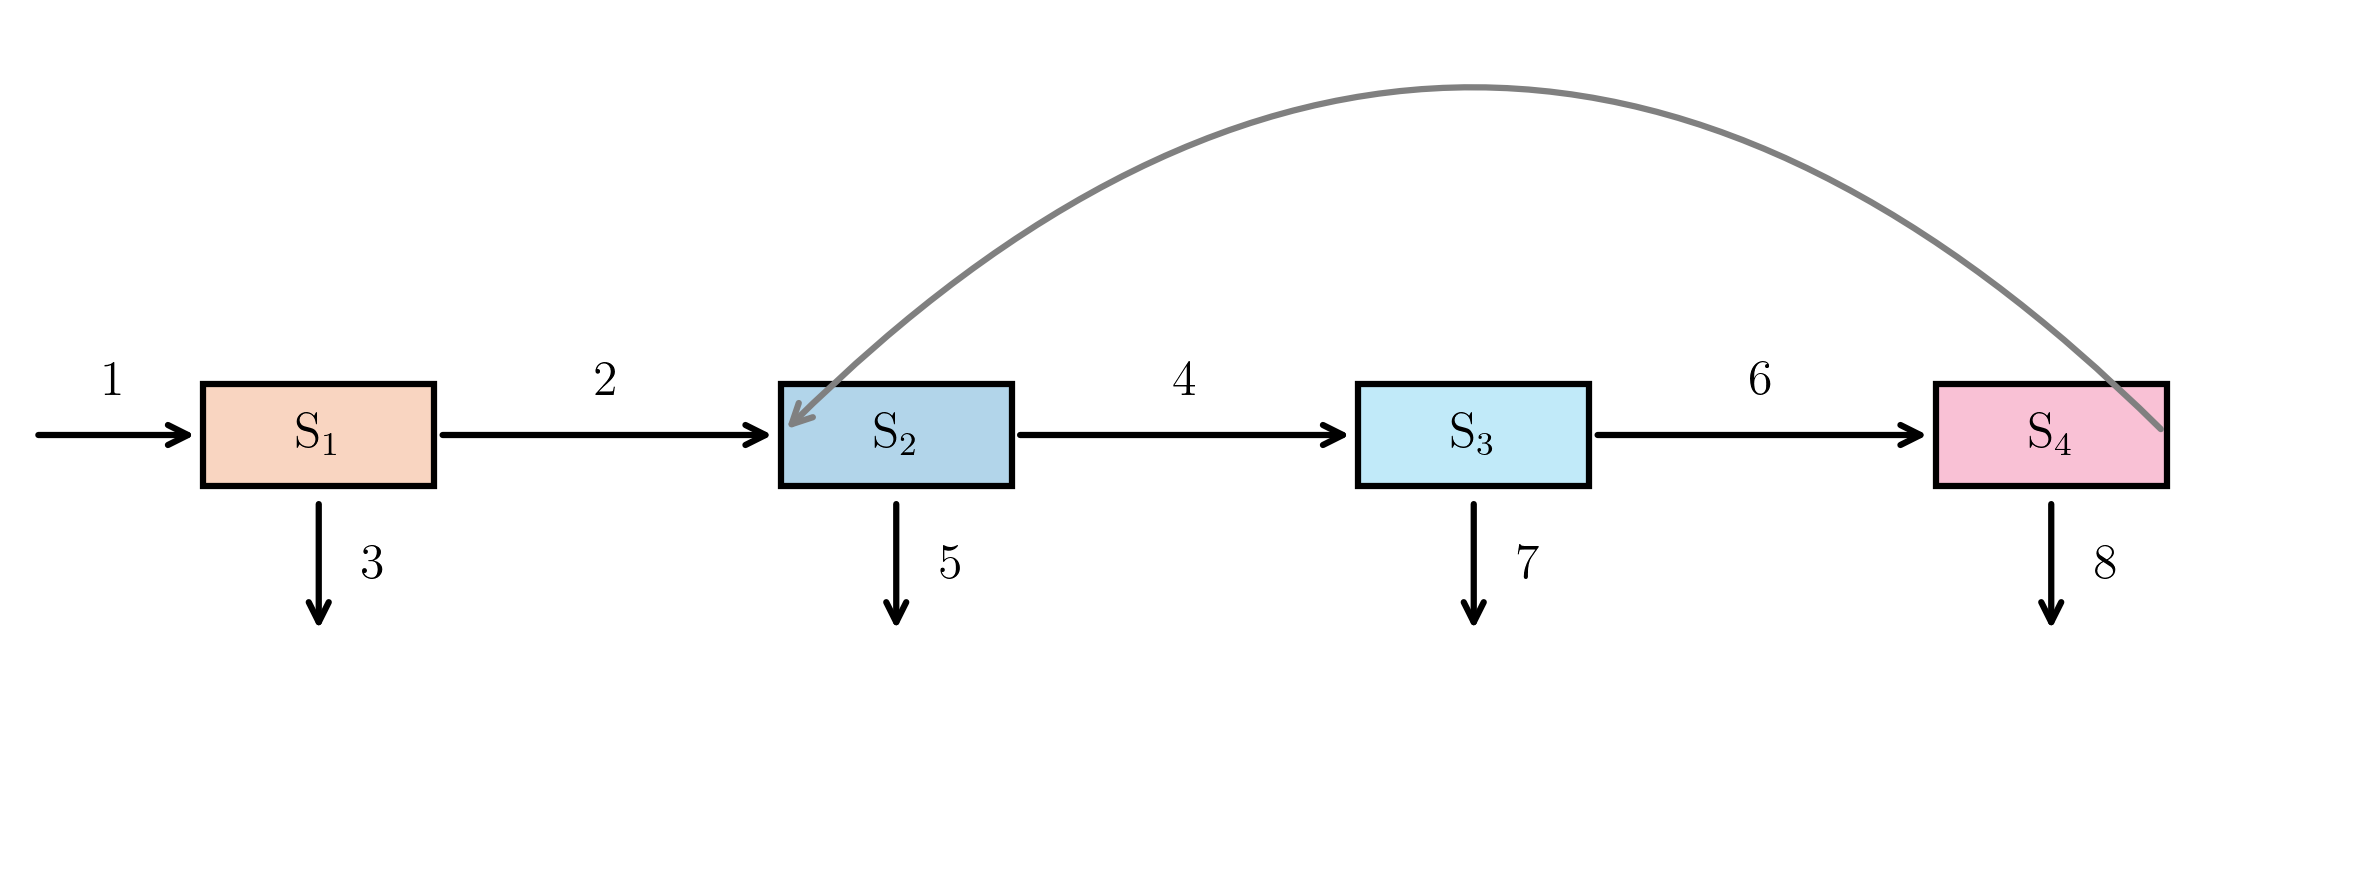

In [91]:
from matplotlib.patches import FancyArrowPatch, Rectangle

# ---------------------------------------------------------
# Helper function: draw a state box with label
# ---------------------------------------------------------
def draw_state(ax, center, label, color):
    x, y = center
    w, h = 0.8, 0.5
    rect = Rectangle((x - w/2, y - h/2), w, h,
                     linewidth=1.5, edgecolor=None,
                     facecolor=color, alpha=0.3)
    rect_2 = Rectangle((x - w/2, y - h/2), w, h,
                     linewidth=1.5, edgecolor="black",
                     fill=False)
    ax.add_patch(rect)
    ax.add_patch(rect_2)
    ax.text(x, y, label, ha="center", va="center", fontsize=12)
    return (x, y, w, h)

# ---------------------------------------------------------
# Helper: draw straight arrow between two centers
# ---------------------------------------------------------
def arrow(ax, start, end, text=None, y_offset=0.0):
    x1, y1 = start
    x2, y2 = end
    arr = FancyArrowPatch(
        (x1, y1 + y_offset), (x2, y2 + y_offset),
        arrowstyle='->', mutation_scale=12, linewidth=1.5, color='black'
    )
    ax.add_patch(arr)
    if text:
        ax.text((x1+x2)/2, y1 + y_offset + 0.15, text,
                ha="center", va="bottom", fontsize=12)

# ---------------------------------------------------------
# Build figure
# ---------------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 3))

# Node positions (all on same horizontal line)
y0 = 0
S1 = draw_state(ax, (0, y0), "S$_1$", colors[0])
S2 = draw_state(ax, (2, y0), "S$_2$", colors[1])
S3 = draw_state(ax, (4, y0), "S$_3$", colors[2])
S4 = draw_state(ax, (6, y0), "S$_4$", colors[3])

# ---------------------------------------------------------
# Straight horizontal arrows (1→S1, S1→S2, S2→S3, S3→S4)
# ---------------------------------------------------------
arrow(ax, (-1.0, y0), (S1[0]-0.4, y0), "1")        # left input
arrow(ax, (S1[0]+0.4, y0), (S2[0]-0.4, y0), "2")
arrow(ax, (S2[0]+0.4, y0), (S3[0]-0.4, y0), "4")
arrow(ax, (S3[0]+0.4, y0), (S4[0]-0.4, y0), "6")

# Vertical output arrows (3, 5, 7, 8)
for (cx, cy, _, _), label in zip([S1, S2, S3, S4], ["3", "5", "7", "8"]):
    arr = FancyArrowPatch((cx, cy - 0.3), (cx, cy - 1.0),
                          arrowstyle='->', mutation_scale=12,
                          linewidth=1.5, color="black")
    ax.add_patch(arr)
    ax.text(cx + 0.15, cy - 0.65, label, fontsize=12, va="center")

# ---------------------------------------------------------
# Feedback arc S4 → S2 (curved)
# ---------------------------------------------------------
curve = FancyArrowPatch(
    (S4[0]+0.4, y0), (S2[0]-0.4, y0),
    arrowstyle='->',
    mutation_scale=12,
    linewidth=1.5,
    connectionstyle="arc3,rad=0.5",
    color="gray"
)
ax.add_patch(curve)

# Label "??" for the feedback arc (number  ? )
ax.text((S4[0]+S2[0])/2, y0 + 1.0, "", fontsize=12)

# ---------------------------------------------------------
# Formatting
# ---------------------------------------------------------
ax.set_xlim(-1, 7)
ax.set_ylim(-2, 2)
ax.axis("off")

plt.tight_layout()
plt.show()


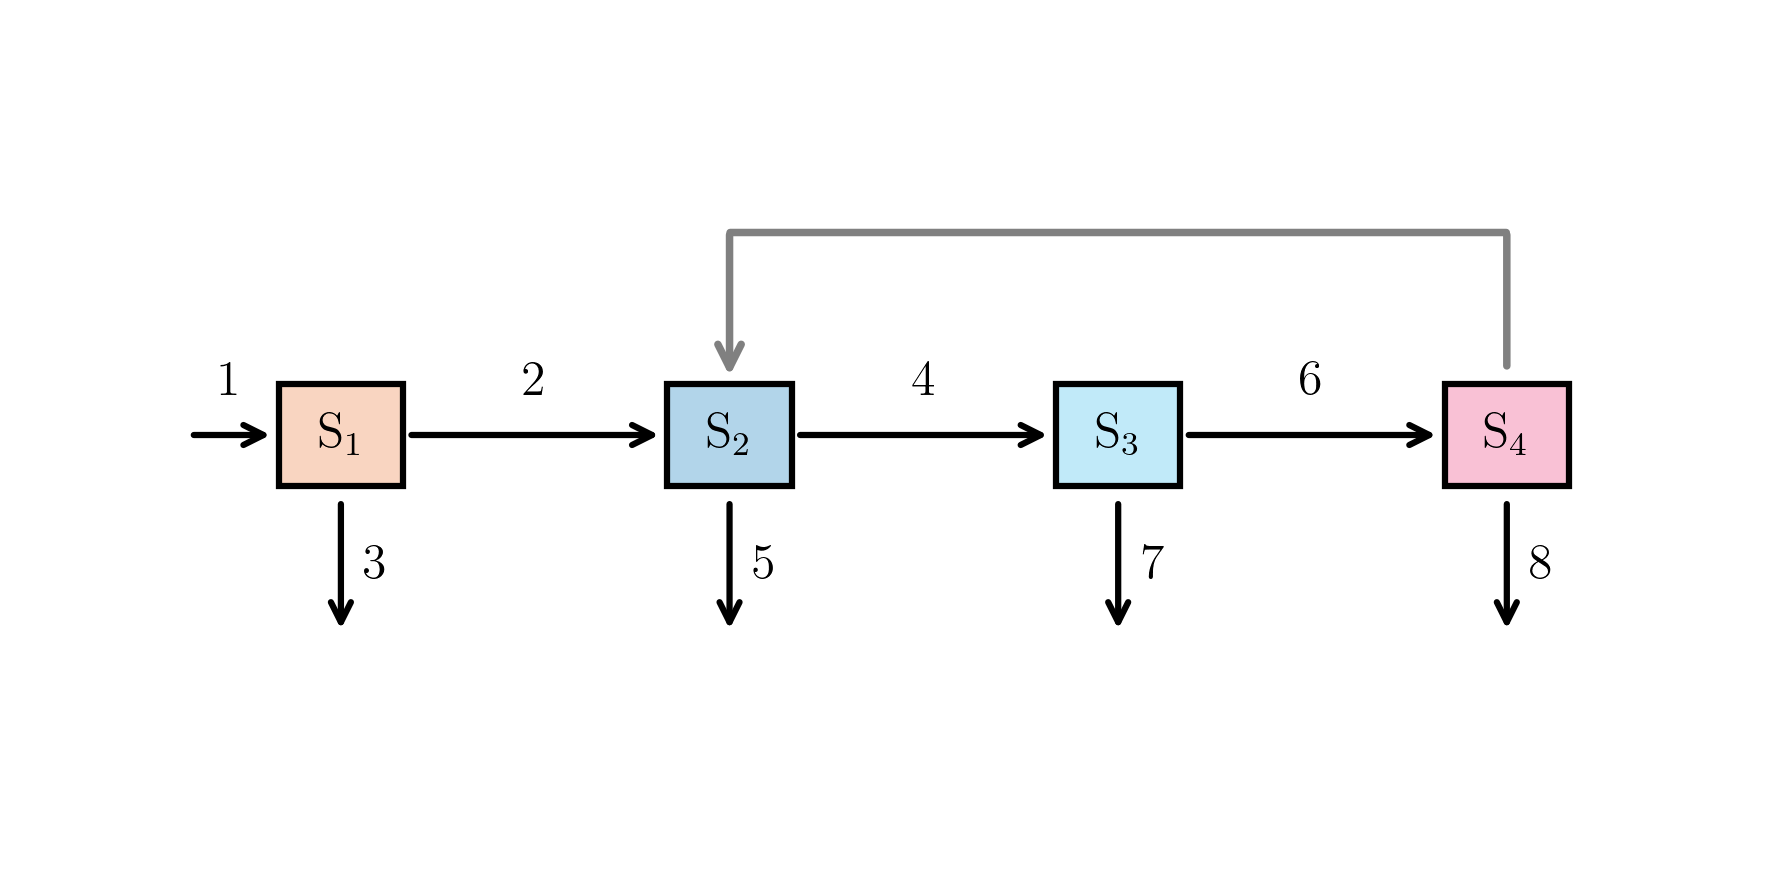

In [96]:
fig, ax = plt.subplots(figsize=(6, 3))

# Node positions (all on same horizontal line)
y0 = 0
S1 = draw_state(ax, (0, y0), "S$_1$", colors[0])
S2 = draw_state(ax, (2.5, y0), "S$_2$", colors[1])
S3 = draw_state(ax, (5.0, y0), "S$_3$", colors[2])
S4 = draw_state(ax, (7.5, y0), "S$_4$", colors[3])

# ---------------------------------------------------------
# Straight horizontal arrows (1→S1, S1→S2, S2→S3, S3→S4)
# ---------------------------------------------------------
arrow(ax, (-1.0, y0), (S1[0]-0.4, y0), "1")        # left input
arrow(ax, (S1[0]+0.4, y0), (S2[0]-0.4, y0), "2")
arrow(ax, (S2[0]+0.4, y0), (S3[0]-0.4, y0), "4")
arrow(ax, (S3[0]+0.4, y0), (S4[0]-0.4, y0), "6")

# Vertical output arrows (3, 5, 7, 8)
for (cx, cy, _, _), label in zip([S1, S2, S3, S4], ["3", "5", "7", "8"]):
    arr = FancyArrowPatch((cx, cy - 0.3), (cx, cy - 1.0),
                          arrowstyle='->', mutation_scale=12,
                          linewidth=1.5, color="black")
    ax.add_patch(arr)
    ax.text(cx + 0.15, cy - 0.65, label, fontsize=12, va="center")

# Example positions (use your own)
S1_pos = (0, 0)
S2_pos = (2.5, 0)
S3_pos = (5.0, 0)
S4_pos = (7.5, 0)

# Draw rectangular-corner feedback: S4 → S2
x4, y4 = S4_pos
x2, y2 = S2_pos

# Segment 1: Up
ax.add_patch(FancyArrowPatch(
    (x4, y4+0.3), (x4, y4 + 1.03),
    arrowstyle='-', linewidth=1.8, color="gray"))

# Segment 2: Left
ax.add_patch(FancyArrowPatch(
    (x4+0.05, y4 + 1), (x2-0.05, y2 + 1),
    arrowstyle='-', linewidth=1.8, color="gray"))

# Segment 3: Down with arrow head
ax.add_patch(FancyArrowPatch(
    (x2, y2 + 1.03), (x2, y2+0.25),
    arrowstyle='->', mutation_scale=14, linewidth=1.8, color="gray"))

# ax.set_xlim(-1, 10)
# ax.set_ylim(-2, 3)
# ax.axis("off")
# plt.show()

# Label "??" for the feedback arc (number  ? )
ax.text((S4[0]+S2[0])/2, y0 + 1.0, "", fontsize=12)

# ---------------------------------------------------------
# Formatting
# ---------------------------------------------------------
ax.set_xlim(-2, 9)
ax.set_ylim(-2, 2)
ax.axis("off")

plt.tight_layout()
plt.show()



## **Example 2: Model of complex formation**

The model of complex formation has also been investigated in [4]. It is a basic
model of a bilinear reaction in that two species, A, B, reversibly form a complex AB
together. Only the two reactions of complex formation and complex decomposition
are modelled. The model contains three species, two rate coefficients and no other
parameters.

$$\frac{dA}{dt} = -k_1\,A\,B + k_2\,AB$$

$$\frac{dB}{dt} = -k_1\,A\,B + k_2\,AB$$

$$\frac{d(AB)}{dt} = k_1\,A\,B - k_2\,AB$$

We employed the following parameter set: $k_1 = 1$, $k_2 = 2$, with initial conditions
$A = 10, B = 5, C = 2$ (C should change to AB).

In [38]:
def model_complex_formation(y, params):
    A, B, AB = y
    k1, k2 = params
    dAdt = -k1 * A * B + k2 * AB
    dBdt = -k1 * A * B + k2 * AB
    dABdt = k1 * A * B - k2 * AB
    
    return np.array([dAdt, dBdt, dABdt], dtype=float)

def solve_complex_formation(initial_conditions, time_points, k1, k2):
    def model(t, x):
        return model_complex_formation(x, (k1, k2))
    sol = solve_ivp(model, [time_points[0], time_points[-1]], initial_conditions,
                    t_eval=time_points, method='RK45', rtol=1e-6)
    return sol

In [ ]:
# Detect loops in the complex formation model
s_star = [[1.0, 1.0, 1.0]]
res_tab_complex = ld.find_loops_vset(model_complex_formation,
                                     vset=s_star,
                                     params=[1.0, 2.0],
                                     max_num_loops=10)
print(res_tab_complex['loop_rep'][0])

           loop  length  sign
0     (0, 1, 0)       2     1
1  (0, 1, 2, 0)       3    -1
2     (0, 2, 0)       2     1
3  (0, 2, 1, 0)       3    -1
4     (1, 2, 1)       2     1
5        (0, 0)       1    -1
6        (1, 1)       1    -1
7        (2, 2)       1    -1


In [45]:
# Calculate Jacobian at s_star
j_matrix = numdifftools.Jacobian(model_complex_formation, method='central')(np.array(s_star[0]), params=[1.0, 2.0])
signed_jacobian = np.sign(j_matrix)
print("Signed Jacobian matrix at s_star:")
print(signed_jacobian)

Signed Jacobian matrix at s_star:
[[-1. -1.  1.]
 [-1. -1.  1.]
 [ 1.  1. -1.]]


In [41]:
time_points = np.linspace(0, 1, 111)
initial_conditions = [10.0, 5.0, 2.0]  # Initial concentrations of A, B, and AB
k1 = 1.0  # Rate constant for complex formation
k2 = 2.0  # Rate constant for complex dissociation

sol = solve_complex_formation(initial_conditions, time_points, k1, k2)

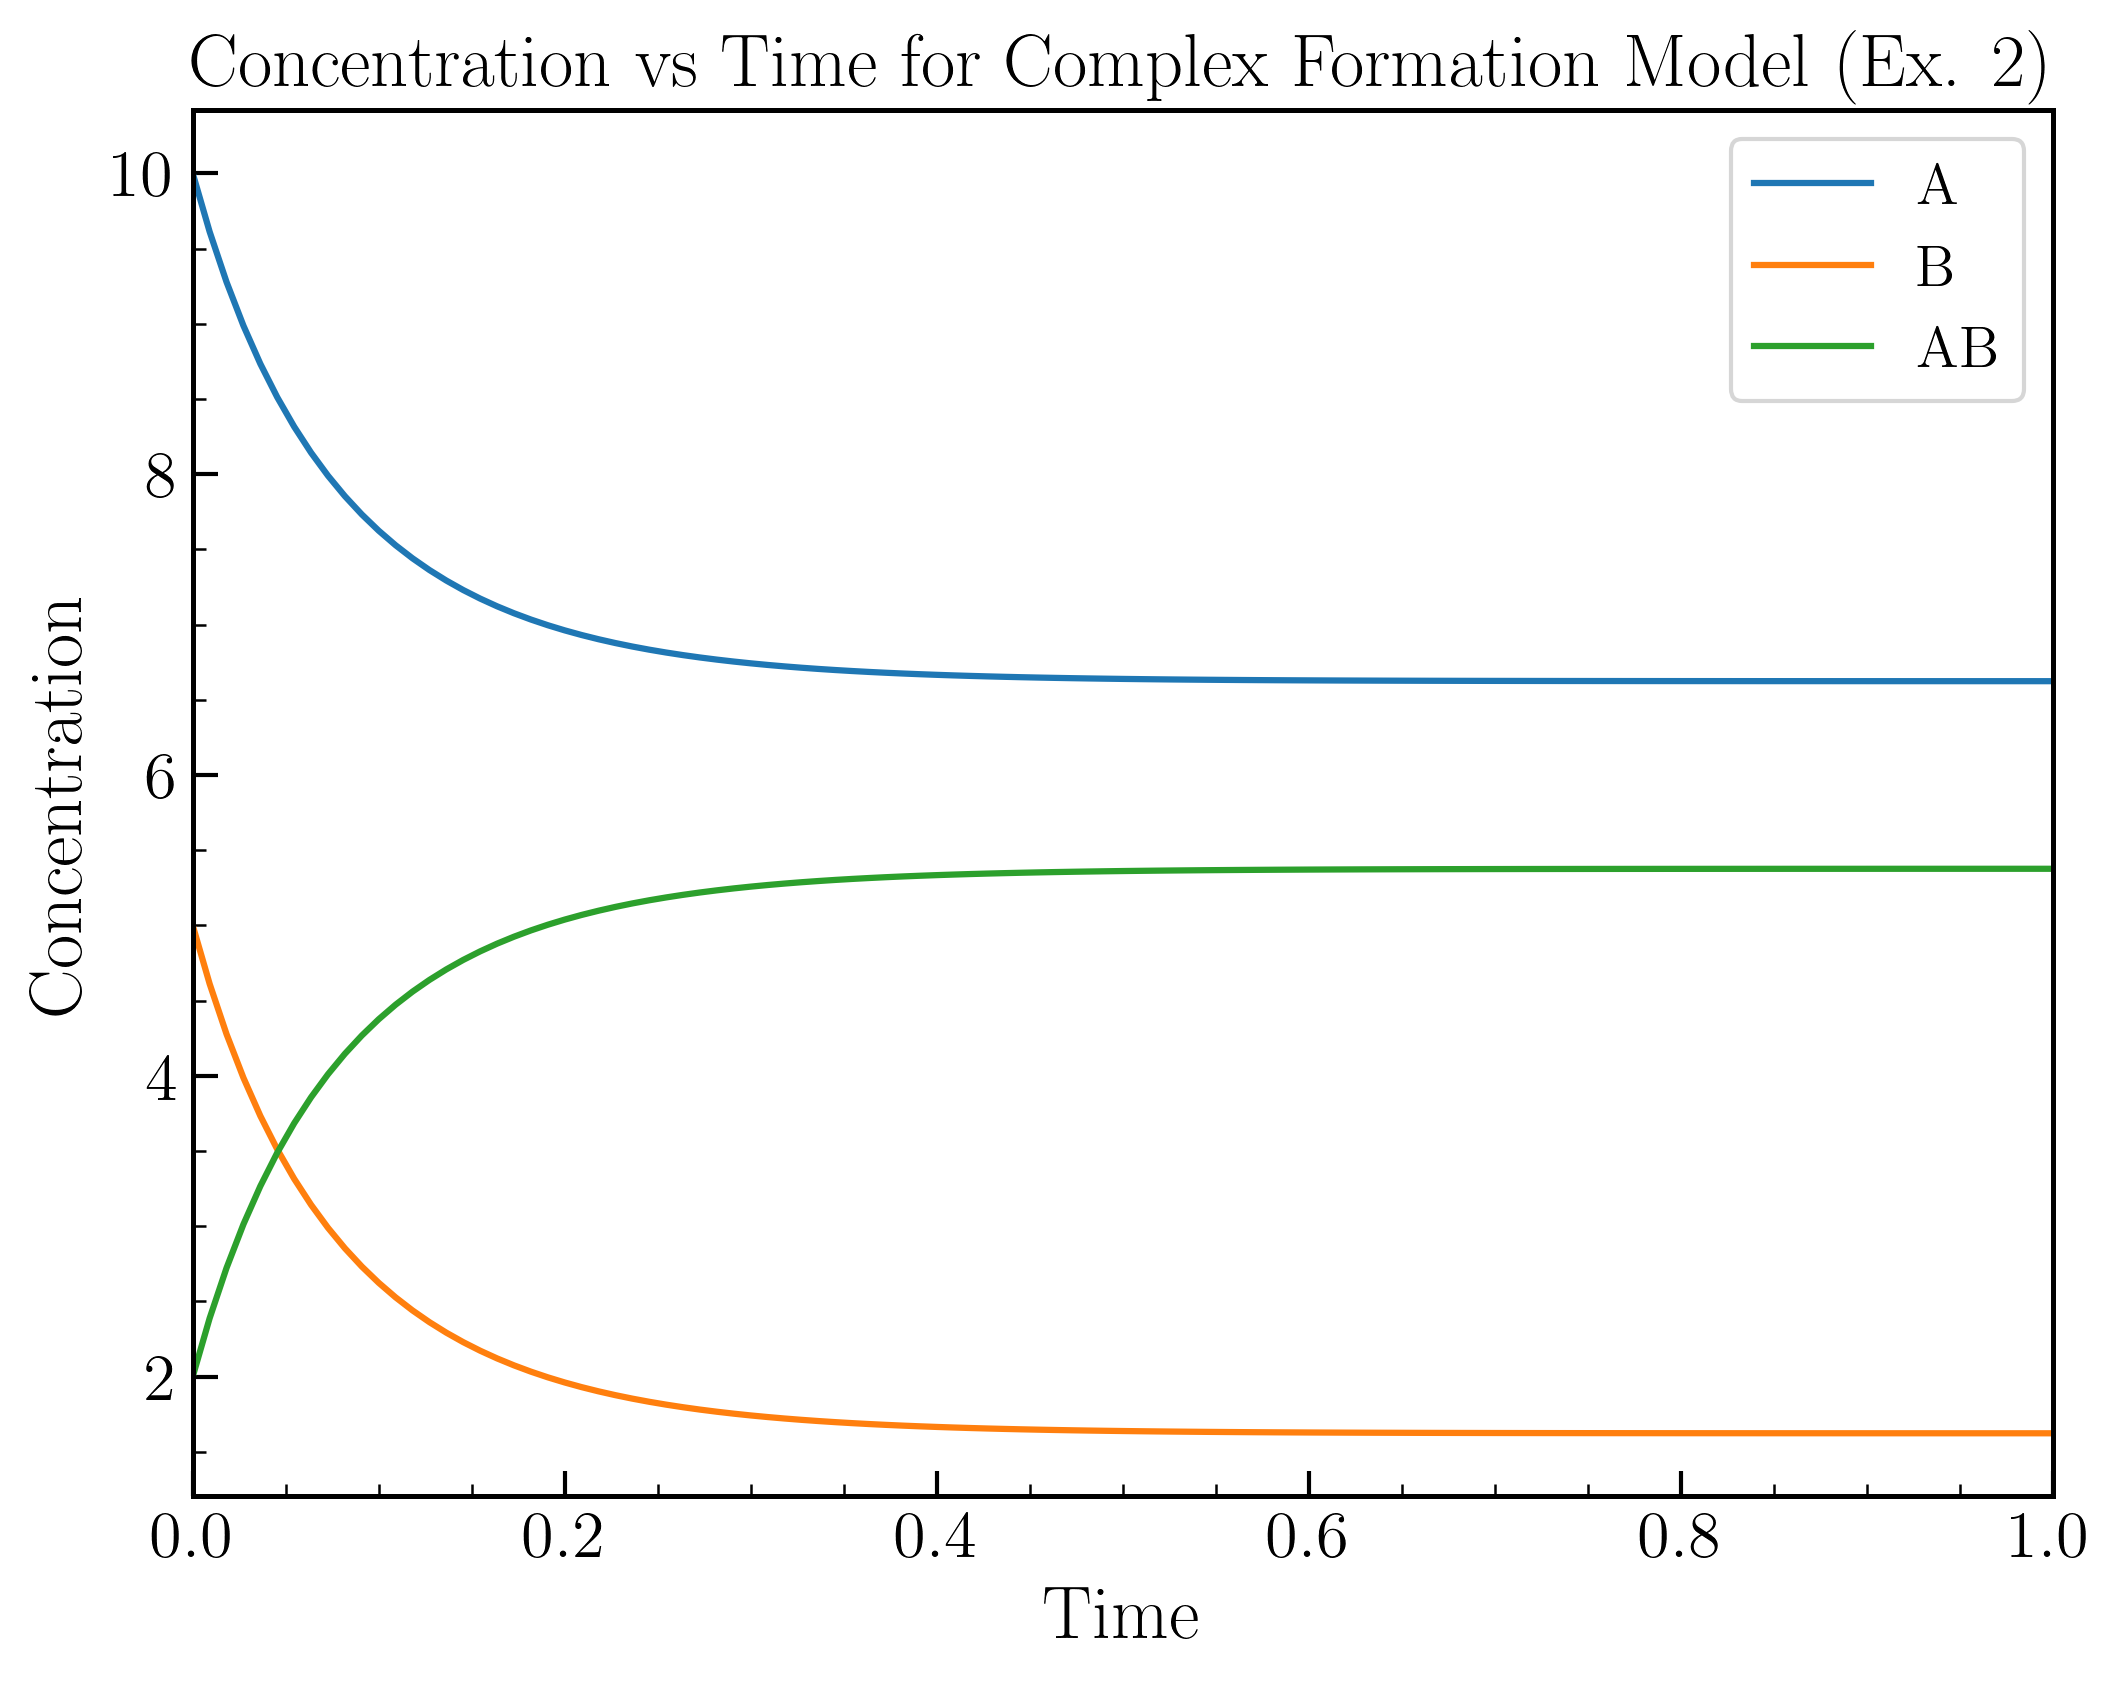

In [42]:
plt.figure(figsize=(8, 6))
plt.plot(sol.t, sol.y.T)
plt.xlim(0, 1)
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Concentration vs Time for Complex Formation Model (Ex. 2)')
plt.legend(['A', 'B', 'AB'])
plt.show()

## **Example 3: Model of complex formation with activation-deactivation cycle**

The model of complex formation with activation-deactivation cycle has also been investigated in [4]. It is composed of the basic model of complex formation in that A
and B bind to form complex AB as described in section 1.2, together with an activation and deactivation of one of the complex-forming species, B and B∗. In addition
to the two reactions of complex formation and complex decomposition, the activating
reaction and the deactivation reaction are modelled using Michaelis-Menten reaction
kinetics. Thereby, the activation of B to B∗
is in addition stimulus-dependent (the
stimulus is modelled as a parameter, kn3), while the deactivation of B∗
to B depends
linearly on species A. The model contains four species, A, B, AB, B∗
, four rate coefficients, k1 . . . , k4, two activation constants, kn1, kn2, and a stimulus parameter, kn3.

$$
\begin{aligned}
\frac{dA}{dt} &= -k_1\,A\,B + k_2\,AB ,\\[6pt]
\frac{dB}{dt} &= -k_1\,A\,B + k_2\,AB + k_3\,A\,\frac{B^*}{B^* + kn_1} - k_4\,kn_3\,\frac{B}{B + kn_2} ,\\[6pt]
\frac{d(AB)}{dt} &= k_1\,A\,B - k_2\,AB ,\\[6pt]
\frac{dB^*}{dt} &= -k_3\,A\,\frac{B^*}{B^* + kn_1} + k_4\,kn_3\,\frac{B}{B + kn_2} .
\end{aligned}
$$

We employed the following parameter set for the analyses: k1 = 0.021458, k2 =
0.000227335, k3 = 663.297, k4 = 0.000139797, kn1 = 55.5913, kn2 = 10.2194, and
values for the stimulus of kn3 = 1 (unstimulated) or kn3 = 20 (stimulated). The initial
conditions were set as A = 5, B = 300, AB = 0.0001, B∗ = 0.01.



In [33]:
def model_complex_formation_act_deact_cycle(y, params):
    # A, B, AB, B_star = y
    # print(y[0])
    A = y[0]
    B = y[1]
    AB = y[2]
    B_star = y[3]
    # print(f"params: {params}")
    k1, k2, k3, k4, kn1, kn2, kn3 = params
    dAdt, dBdt, dABdt, dB_stardt = 0,0,0,0 # I'm curious if it is redundant to do this step
    dAdt = -k1 * A * B + k2 * AB
    dBdt = -k1 * A * B + k2 * AB + k3 * A * (B_star / (B_star + kn1)) - k4 * kn3 * (B / (B + kn2))
    dABdt = k1 * A * B - k2 * AB
    dB_stardt = -k3 * A * (B_star / (B_star + kn1)) + k4 * kn3 * (B / (B + kn2))
    # return [dAdt, dBdt, dABdt, dB_stardt]
    return np.array([dAdt, dBdt, dABdt, dB_stardt], dtype=float)

def solve_complex_formation_act_deact_cycle(initial_conditions, time_points, params):
    def model(t, x):
        return model_complex_formation_act_deact_cycle(x, params)
    sol = solve_ivp(model, [time_points[0], time_points[-1]], initial_conditions,
                    t_eval=time_points, method='RK45', rtol=1e-6)
    return sol

In [20]:
# Initial conditions and parameters for the activation-deactivation cycle model
initial_conditions_act_deact = [10.0, 5.0, 2.0, 3.0]  # Initial concentrations of A, B, AB, and B*
k1 = 1.0   # Rate constant for complex formation
k2 = 2.0   # Rate constant for complex dissociation
k3 = 0.5   # Rate constant for activation
k4 = 0.3   # Rate constant for deactivation
kn1 = 1.0  # Michaelis constant for activation
kn2 = 1.0  # Michaelis constant for deactivation
kn3 = 1.0  # Scaling factor for deactivation
params_act_deact = [k1, k2, k3, k4, kn1, kn2, kn3]
time_points_act_deact = np.linspace(0, 1, 111)

In [34]:
# Solve the activation-deactivation cycle model
sol_act_deact = solve_complex_formation_act_deact_cycle(initial_conditions_act_deact,
                                                  time_points_act_deact,
                                                  [k1, k2, k3, k4, kn1, kn2, kn3])

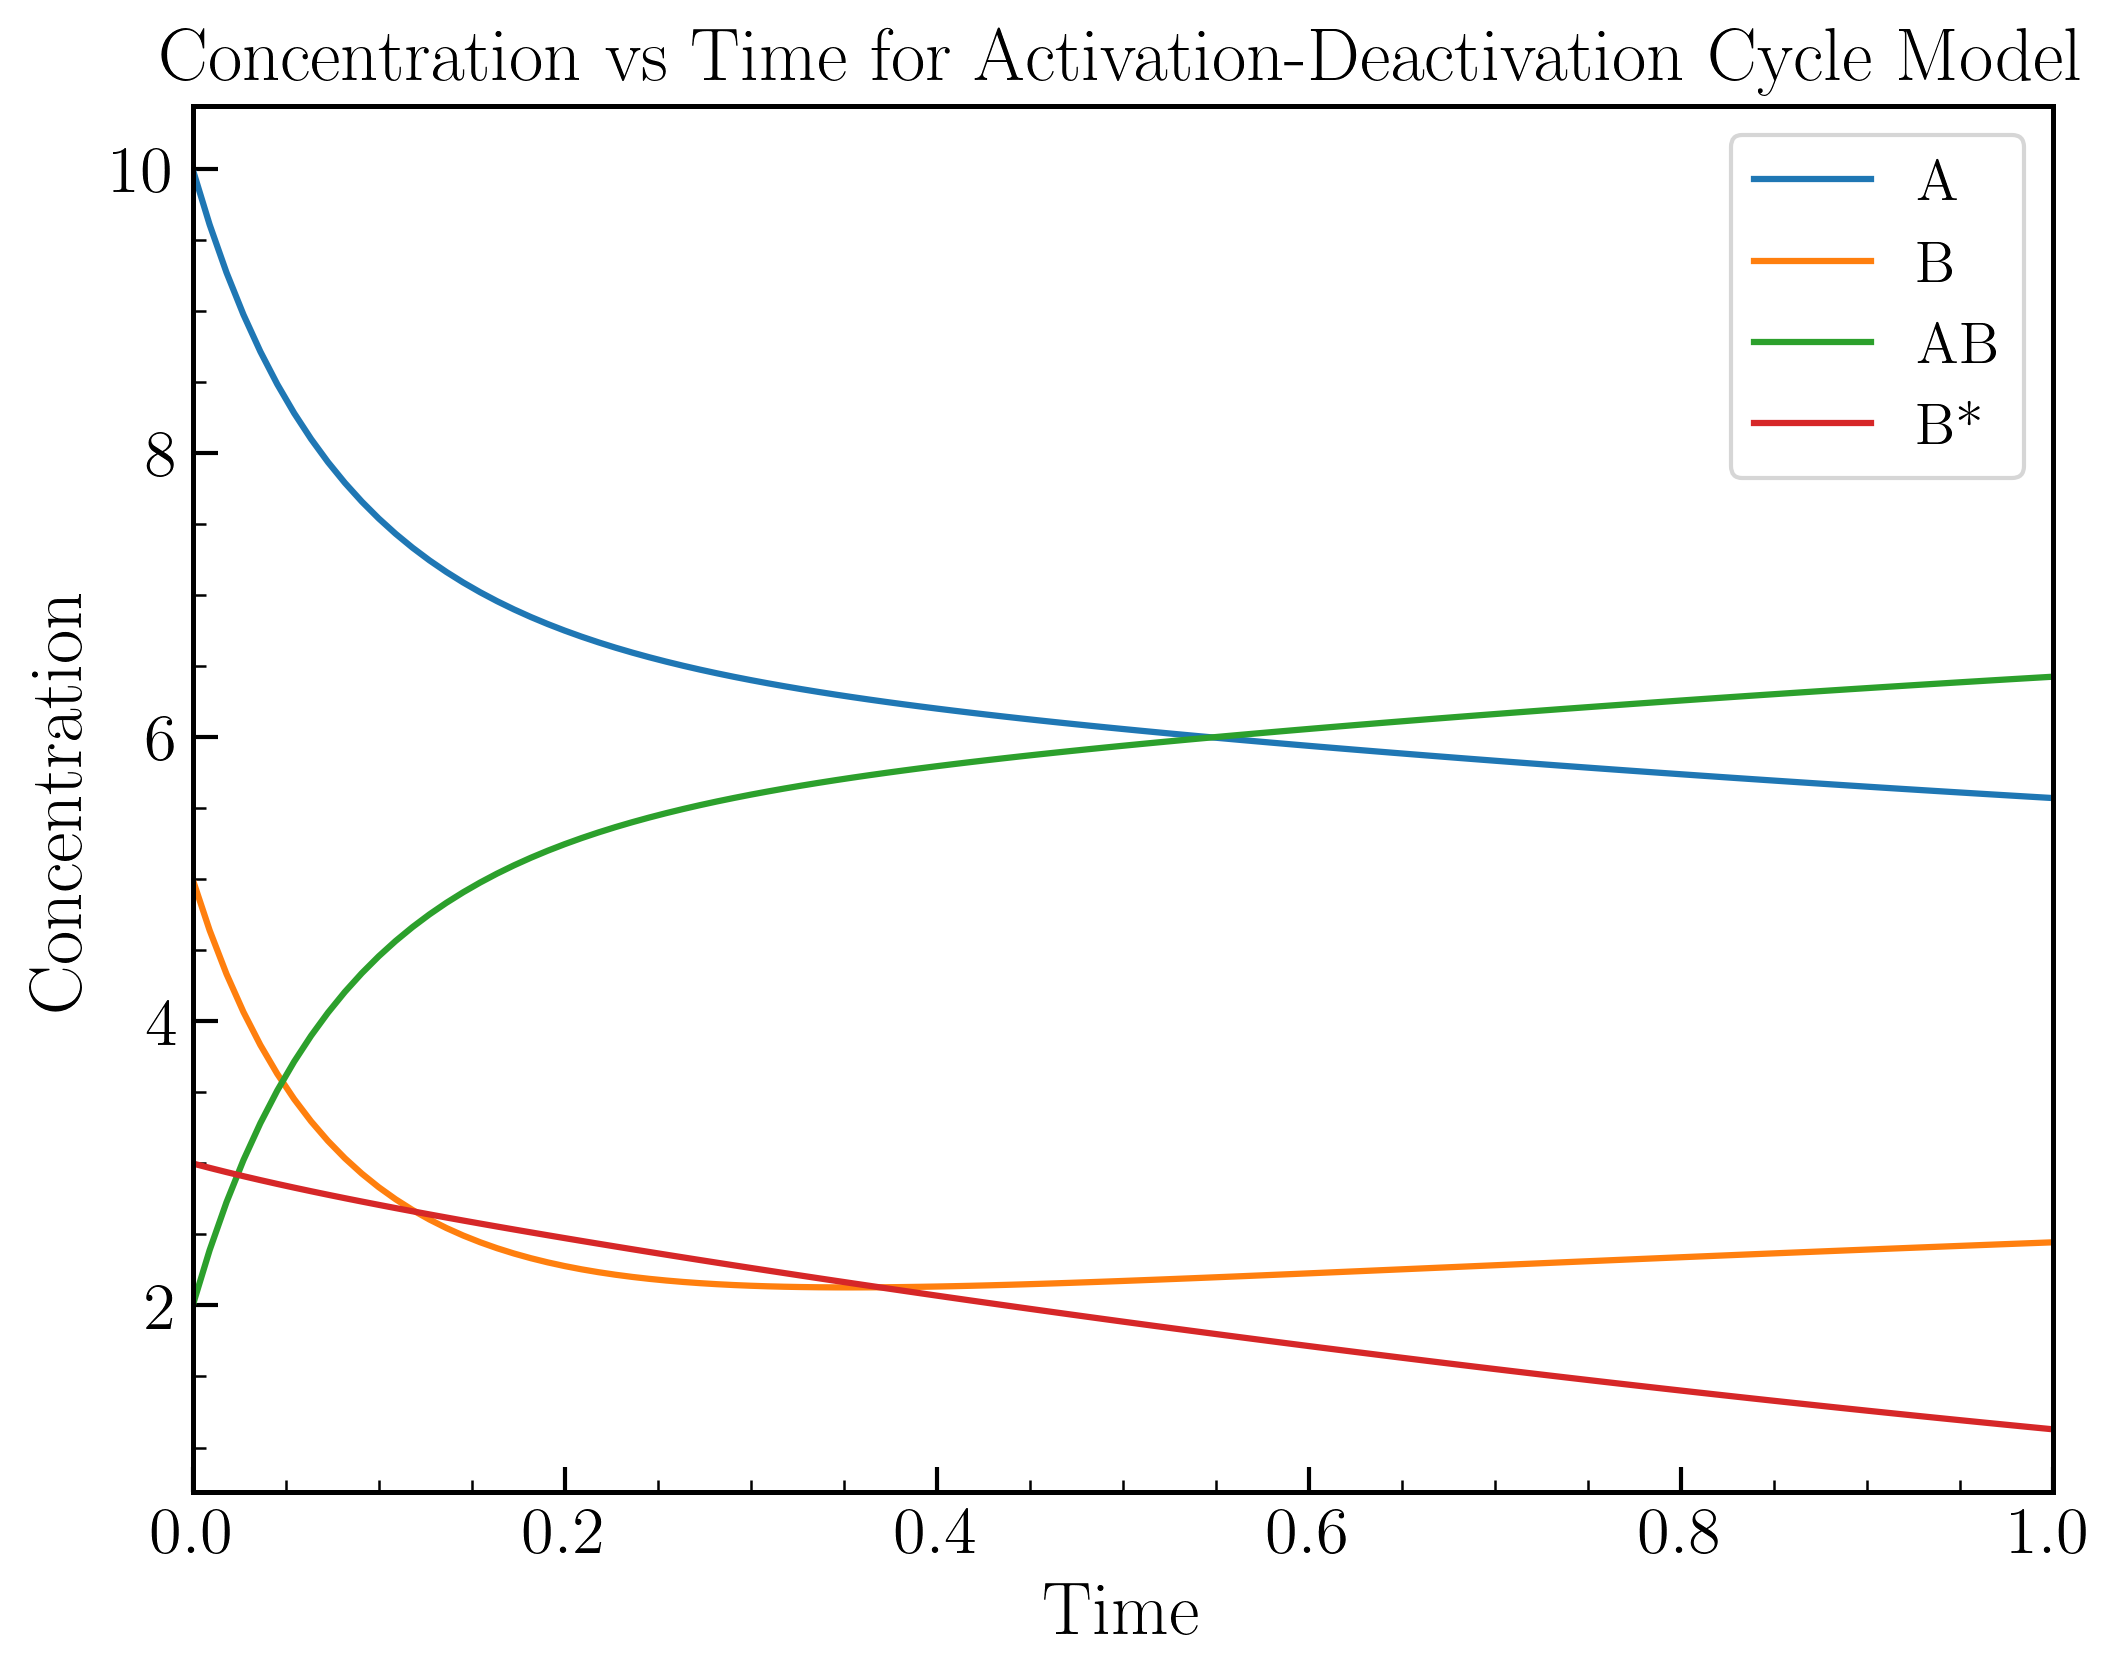

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(sol_act_deact.t, sol_act_deact.y.T)
plt.xlim(0, 1)
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Concentration vs Time for Activation-Deactivation Cycle Model')
plt.legend(['A', 'B', 'AB', 'B*'])
plt.show()

In [46]:
# Loop detection for activation-deactivation cycle model
s_star_3 = [(1.0, 1.0, 1.0, 1.0)]
res_tab_act_deact = ld.find_loops_vset(model_complex_formation_act_deact_cycle,
                                     vset=s_star_3,
                                     params=params_act_deact,
                                     max_num_loops=10)
print(res_tab_act_deact['loop_rep'][0])

              loop  length  sign
0        (0, 1, 0)       2     1
1     (0, 1, 2, 0)       3    -1
2        (0, 2, 0)       2     1
3     (0, 2, 1, 0)       3    -1
4     (0, 3, 1, 0)       3     1
5  (0, 3, 1, 2, 0)       4    -1
6        (1, 2, 1)       2     1
7        (1, 3, 1)       2     1
8           (0, 0)       1    -1
9           (1, 1)       1    -1


In [47]:
# Calculate Jacobian matrix at s_star_3
j_matrix = numdifftools.Jacobian(
    lambda y: model_complex_formation_act_deact_cycle(y, params_act_deact),
    method="central"
)([1,1,1,1])
signed_jacobian = np.sign(j_matrix)

In [48]:
signed_jacobian

array([[-1., -1.,  1.,  0.],
       [-1., -1.,  1.,  1.],
       [ 1.,  1., -1.,  0.],
       [-1.,  1.,  0., -1.]])

In [49]:
loop_list = ld.find_loops(j_matrix)
ld.loop_summary(loop_list)

length,1,2,3,4
total,4,4,3,1
neg,4,0,2,1
pos,0,4,1,0


## **Example 4: Full MAPK cascade model**

In [61]:
res_tab = ld.find_loops_vset(lde.func_li08,
                             vset=np.ones((1,18)),
                             t=0,
                             max_num_loops=100)
# The loop list, a pandas dataframe, is accessed like this:
res_tab['loop_rep'][0]

,loop,length,sign
0,"(0, 1, 0)",2,-1
1,"(0, 2, 1, 0)",3,1
2,"(0, 3, 4, 6, 0)",4,-1
3,"(0, 8, 9, 10, 2, 1, 0)",6,1
4,"(0, 8, 9, 12, 0)",4,-1
5,"(0, 8, 9, 13, 3, 4, 6, 0)",7,1
6,"(8, 9, 11, 8)",3,-1
7,"(1, 2, 1)",2,-1
8,"(0, 0)",1,-1
9,"(1, 1)",1,-1


In [59]:
# Jacobian matrix at the point of interest
j_matrix_li08 = numdifftools.Jacobian(lde.func_li08)(
    np.ones((18,)),
    t=0
).real
signed_jacobian_li08 = np.sign(j_matrix_li08)
print("Signed Jacobian matrix for li08 model at point of interest:")
print(signed_jacobian_li08)

Signed Jacobian matrix for li08 model at point of interest:
[[-1.  1.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [-1. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -1. -1.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0. -1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  1. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1

In [60]:
loop_list_li08 = ld.find_loops(j_matrix_li08)
ld.loop_summary(loop_list_li08)

length,1,2,3,4,6,7
total,15,2,2,2,1,1
neg,14,2,1,2,0,0
pos,1,0,1,0,1,1


In [58]:
# Jacobian matrix at the point of interest
j_matrix_li08 = numdifftools.Jacobian(lde.func_li08,method="complex")(
    np.ones((18,)),
    t=0
).real
signed_jacobian_li08 = np.sign(j_matrix_li08)
print("Signed Jacobian matrix for li08 model at point of interest:")
print(signed_jacobian_li08)

Signed Jacobian matrix for li08 model at point of interest:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
# Solve MAPK cascade model (li08) and plot results
def model_li08(t, x):
    return lde.func_li08(x, t)
time_points_li08 = np.linspace(0, 11, 111)
initial_conditions_li08 = np.ones((18,))  # Initial concentrations for li08 model
sol_li08 = solve_ivp(model_li08, [time_points_li08[0], time_points_li08[-1]], initial_conditions_li08,
                    t_eval=time_points_li08, method='RK45', rtol=1e-6)

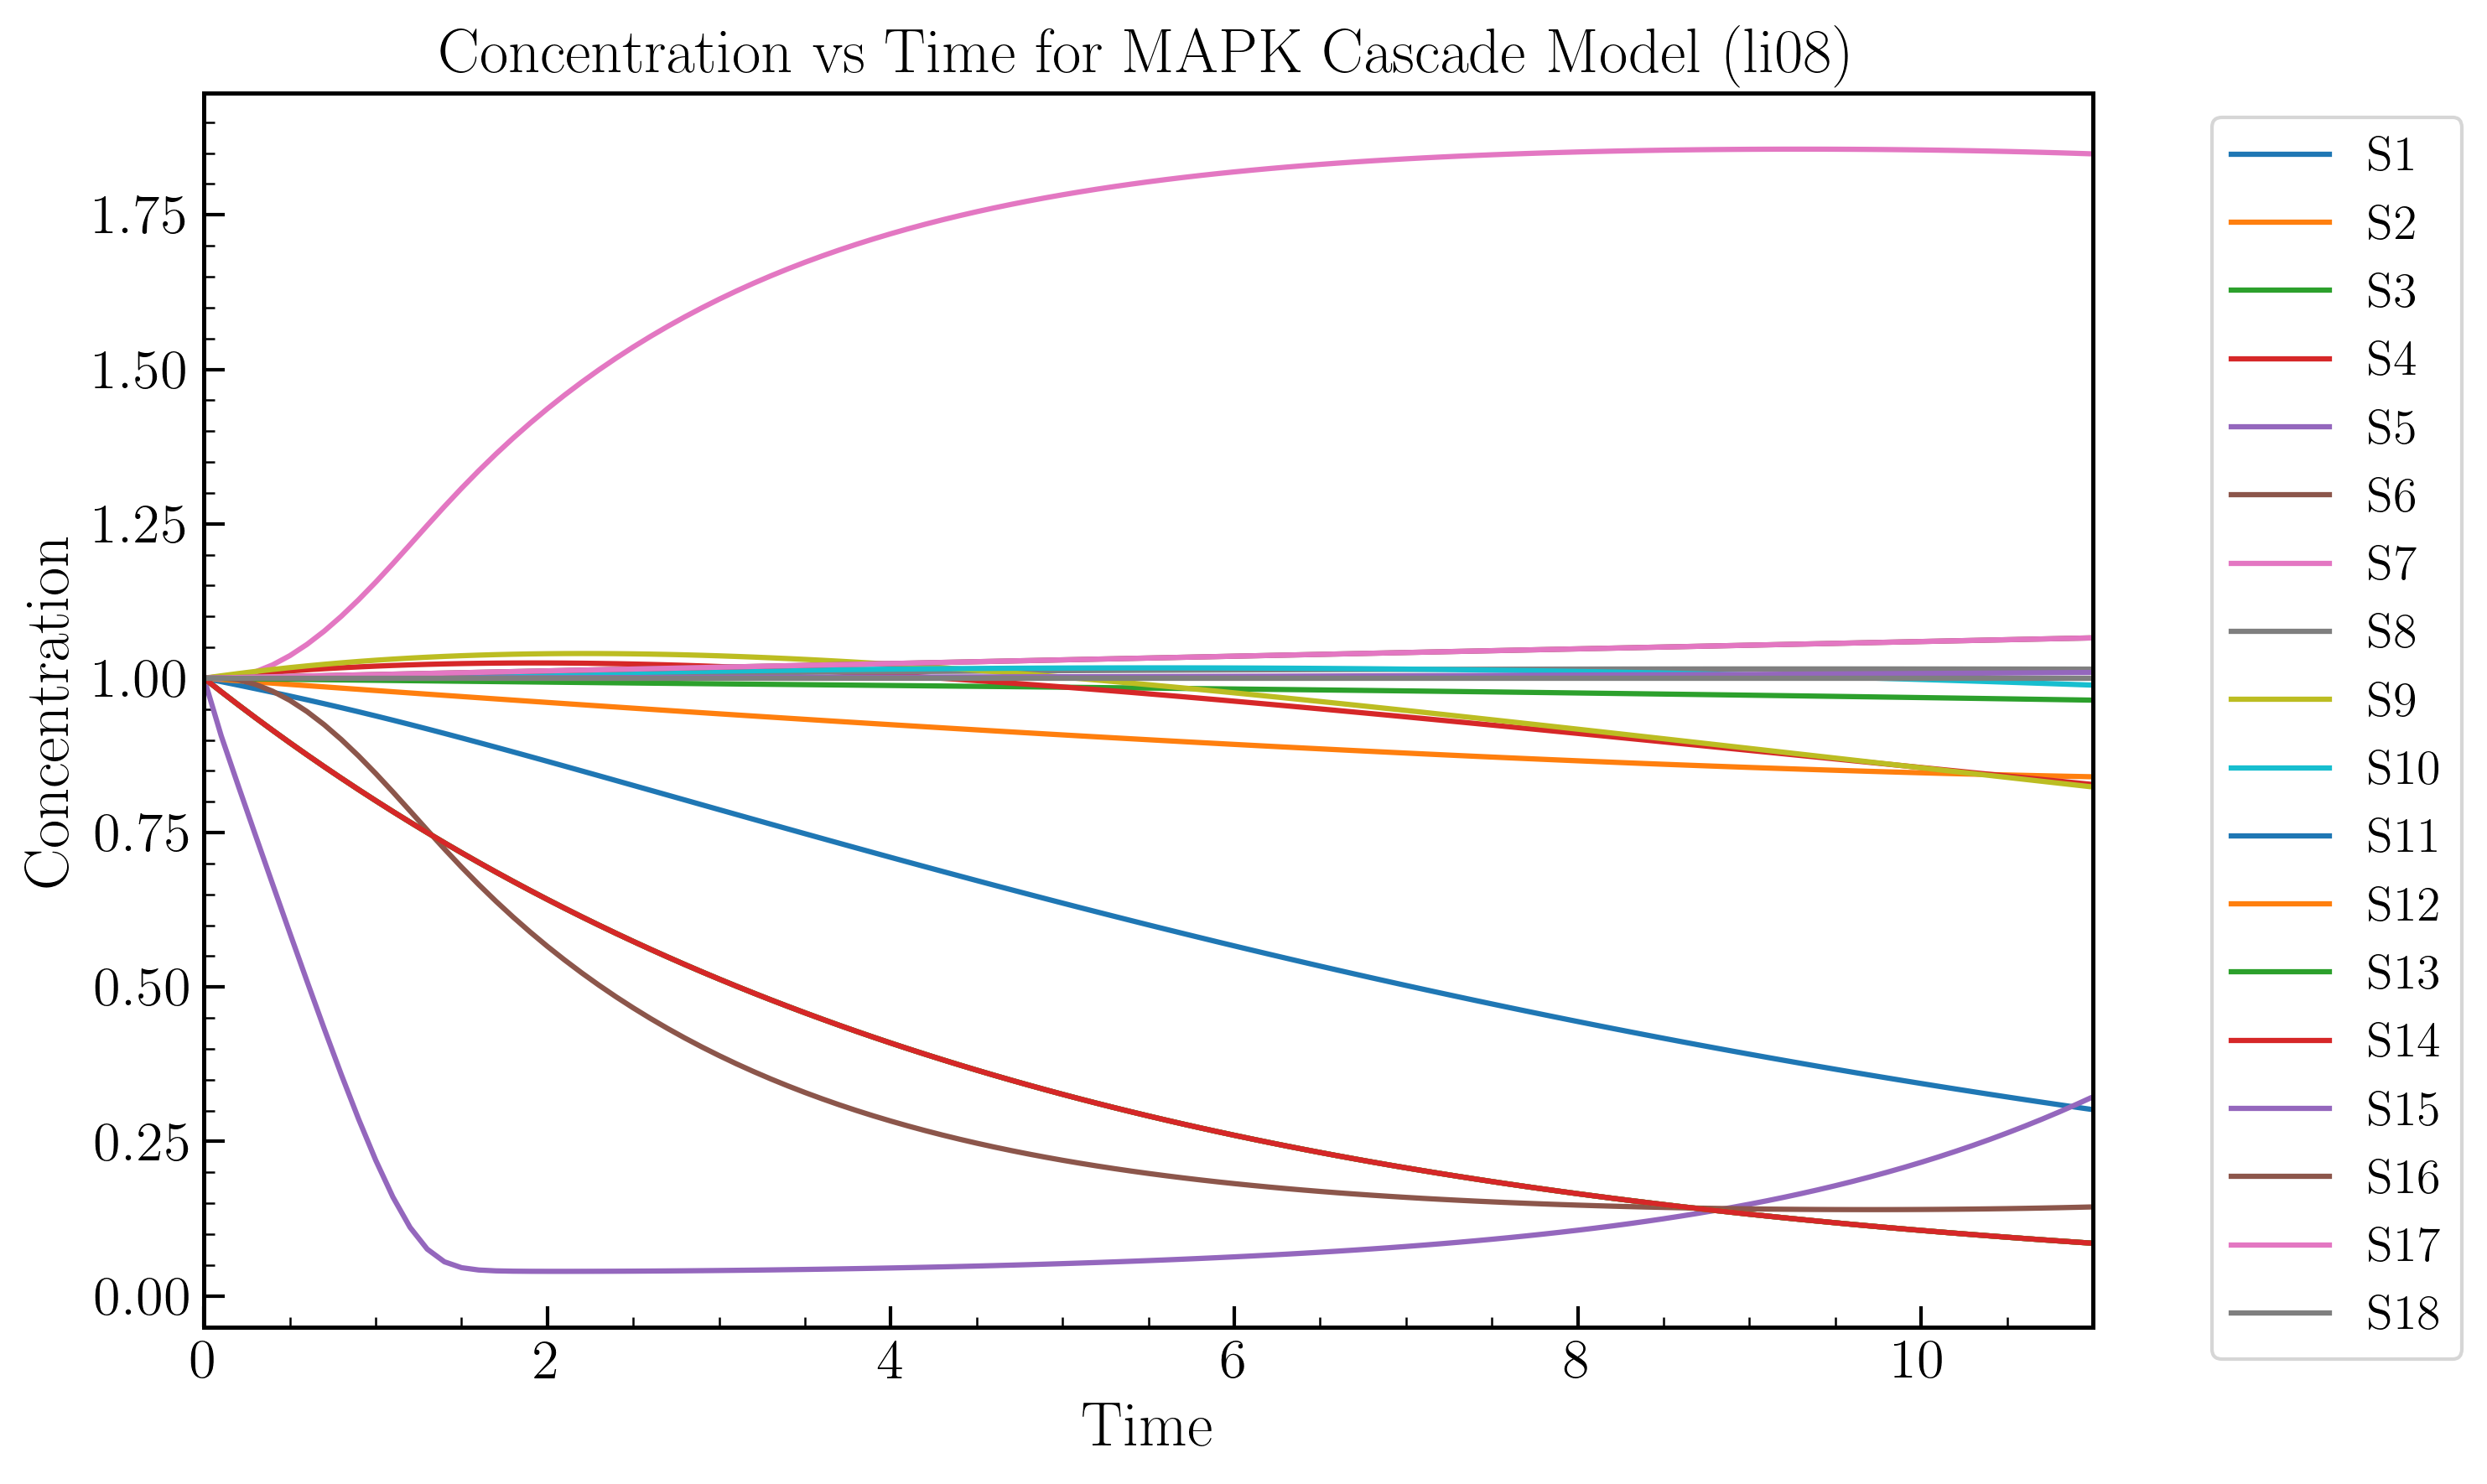

In [109]:
plt.figure(figsize=(10, 6))
plt.plot(sol_li08.t, sol_li08.y.T)
plt.xlim(0, 11)
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Concentration vs Time for MAPK Cascade Model (li08)')
plt.legend([f'S{i+1}' for i in range(18)], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### **Reimplementation**

In [87]:
def model_MAPK_22(y, k):
    """
    22-variable MAPK enzymatic model.
    Variables: S1 ... S22
    Parameters: k1 ... k30 passed as a single list or array k[0] ... k[29]
    """
    # Unpack variables
    S1, S2, S3, S4, S5, S6, S7, S8, S9, S10, \
    S11, S12, S13, S14, S15, S16, S17, S18, S19, S20, \
    S21, S22 = y
    
    # Unpack parameters (k1 ... k30)
    k1, k2, k3, k4, k5, k6, k7, k8, k9, k10, \
    k11, k12, k13, k14, k15, k16, k17, k18, k19, k20, \
    k21, k22, k23, k24, k25, k26, k27, k28, k29, k30 = k

    # ODE system (exactly as in the paper)
    dS1  = -k1*S1*S3 + k2*S13 + k3*S13
    dS2  = -k4*S2*S4 + k5*S14 + k6*S14
    dS3  = -k1*S1*S3 + k2*S13 + k6*S14
    dS4  =  k3*S13 - k4*S2*S4 + k5*S14 \
            - k7*S5*S4 + k8*S15 + k9*S15
    dS5  = -k7*S5*S4 + k8*S15 + k12*S20
    dS6  =  k9*S15 - k10*S6*S12 + k11*S20 \
            - k13*S6*S4 + k14*S16 + k18*S19
    dS7  =  k15*S16 - k10*S7*k17 + k17*S19 \
            - k19*S8*S7 + k20*S18 + k27*S18
    dS8  = -k19*S8*S7 + k20*S17 + k24*S22
    dS9  =  k21*S17 - k22*S9*S11 + k23*S22 \
            - k25*S9*S7 + k26*S18 + k30*S21
    dS10 =  k27*S18 - k28*S10*S11 + k29*S21
    dS11 = -k22*S9*S11 + k23*S22 - k28*S10*S11 + k29*S21
    dS12 = -k10*S6*S12 + k11*S20 - k17*S12 + k18*S19
    dS13 =  k1*S1*S3 - k2*S13 - k3*S13
    dS14 =  k4*S2*S4 - k5*S14 - k6*S14
    dS15 =  k7*S5*S4 - k8*S15 - k9*S15
    dS16 =  k13*S6*S4 - k14*S16 - k15*S16
    dS17 =  k19*S8*S7 - k20*S17 - k21*S17
    dS18 =  k25*S9*S7 - k26*S18 - k27*S18
    dS19 =  k16*S7*S12 - k17*S19 - k18*S19
    dS20 =  k10*S6*S12 - k11*S20 - k12*S20
    dS21 =  k28*S10*S11 - k29*S21 - k30*S21
    dS22 =  k22*S9*S11 - k23*S22 - k24*S22

    return np.array([
        dS1, dS2, dS3, dS4, dS5, dS6, dS7, dS8, dS9, dS10,
        dS11, dS12, dS13, dS14, dS15, dS16, dS17, dS18,
        dS19, dS20, dS21, dS22
    ], dtype=float)


def solve_MAPK_22(initial_conditions, time_points, k):
    def ode(t, x):
        return model_MAPK_22(x, k)
    
    sol = solve_ivp(
        ode,
        [time_points[0], time_points[-1]],
        initial_conditions,
        t_eval=time_points,
        method="RK45",
        rtol=1e-6
    )
    return sol


In [88]:
# Activation rates
big = 1000.0
# Dephos / dissociation rates
mid = 150.0

params_22 = [
    big, mid, mid,       # k1, k2, k3
    big, mid, mid,       # k4, k5, k6
    big, mid, mid,       # k7, k8, k9
    big, mid, mid,       # k10, k11, k12
    big, mid, mid,       # k13, k14, k15
    big, mid, mid,       # k16, k17, k18
    big, mid, mid,       # k19, k20, k21
    big, mid, mid,       # k22, k23, k24
    big, mid, mid,       # k25, k26, k27
    big, mid, mid        # k28, k29, k30
]

initial_conditions_22 = [
    3e-5,   # S1  E1
    3e-4,   # S2  E2
    0.003,  # S3  MAPKKK
    0.0,    # S4
    1.2,    # S5 MAPKK
    0.0,    # S6
    0.0,    # S7
    1.2,    # S8 MAPK
    0.0,    # S9
    0.0,    # S10
    0.12,   # S11 KPase
    3e-4,   # S12 KK_Pase
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  # S13–S22
]


In [89]:
t = np.linspace(0, 2000, 20001)
sol = solve_MAPK_22(initial_conditions_22, t, params_22)

KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(sol.t, sol.y[7, :], label="MAPK (S8)", color="blue", lw=2)
ax.plot(sol.t, sol.y[6, :], label="MAPK-P (S9)", color="orange", lw=2)
ax.plot(sol.t, sol.y[5, :], label="MAPK-PP (S10)", color="green", lw=2)
ax.set_xlabel("Time")
ax.set_ylabel("Concentration")
ax.set_title("Concentration vs Time for 22-Variable MAPK Model")
ax.legend()

## **Example 5: Reduced MAPK cascade model with and without explicit feedback regulation**


In [68]:
def model_mapk_simple(y, klin, kn, n1):
    S1, S2, S3, S4, S5, S6, S7, S8 = y
    
    # Unpack kinetic parameters
    k1, k2, k3, k4, k5, k6, k7, k8, k9, k10 = klin
    
    # Unpack saturation constants
    kn1, kn2, kn3, kn4, kn5, kn6, kn7, kn8, kn9, kn10, kn11 = kn
    
    # dS1/dt
    term_inhibit = (kn1**n1) / (kn1**n1 + S8**n1)
    dS1 = -k1 * (S1/(kn2 + S1)) * term_inhibit \
          + k2 * (S2/(S2 + kn3))
    
    # dS2/dt
    dS2 =  k1 * (S1/(kn2 + S1)) * term_inhibit \
          - k2 * (S2/(S2 + kn3))
    
    # dS3/dt
    dS3 = k6 * (S4/(kn7 + S4)) \
          - k3 * (S2*S3/(kn4 + S3))
    
    # dS4/dt
    dS4 = k3 * (S2*S3/(kn4 + S3)) \
          - k6 * (S4/(kn7 + S4)) \
          + k5 * (S5/(kn6 + S5)) \
          - k4 * (S2*S4/(kn5 + S4))
    
    # dS5/dt
    dS5 = k4 * (S2*S4/(kn5 + S4)) \
          - k5 * (S5/(kn6 + S5))
    
    # dS6/dt
    dS6 = k10 * (S7/(kn11 + S7)) \
          - k7 * (S5*S6/(kn8 + S6))
    
    # dS7/dt
    dS7 =  k7 * (S5*S6/(kn8 + S6)) \
            - k10 * (S7/(kn11 + S7)) \
            - k8 * (S5*S7/(kn9 + S7)) \
            + k9 * (S8/(kn10 + S8))
    
    # dS8/dt
    dS8 =  k8 * (S5*S7/(kn9 + S7)) \
           - k9 * (S8/(kn10 + S8))
    
    return np.array([dS1, dS2, dS3, dS4, dS5, dS6, dS7, dS8], dtype=float)

def solve_model_mapk_simple(initial_conditions, time_points, klin, kn, n1):
    def ode(t, x):
        return model_mapk_simple(x, klin, kn, n1)
    
    sol = solve_ivp(ode,
                    [time_points[0], time_points[-1]],
                    initial_conditions,
                    t_eval=time_points,
                    method="RK45",
                    rtol=1e-6)
    return sol


In [70]:
# klin = [k1, k2, k3, k4, k5, k6, k7, k8, k9, k10]
# kn   = [kn1, kn2, kn3, kn4, kn5, kn6, kn7, kn8, kn9, kn10, kn11]
# n    = n1     # only the first reaction uses a Hill exponent
# s_star_mapk = [(1,1,1,1,1,1,1,1)]

klin = [
    2.5,        # k1
    0.25,       # k2
    0.025,      # k3
    0.025,      # k4
    0.75,       # k5
    0.75,       # k6
    0.025,      # k7
    0.025,      # k8
    0.5,        # k9
    0.5         # k10
]

kn = [
    9,          # kn1 = KI
    10,         # kn2 = K1
    8,          # kn3 = K2
    15,         # kn4
    15,         # kn5
    15,         # kn6
    15,         # kn7
    15,         # kn8
    15,         # kn9
    15,         # kn10
    15          # kn11
]

n1 = 1
initial_conditions = [
    100,    # S1
    0,      # S2
    300,    # S3
    0,      # S4
    0,      # S5
    300,    # S6
    0,      # S7
    0       # S8
]


In [71]:
sol = solve_model_mapk_simple(initial_conditions,
                              time_points=np.linspace(0, 5000, 5001),
                                klin=klin,
                                kn=kn,
                                n1=n1)

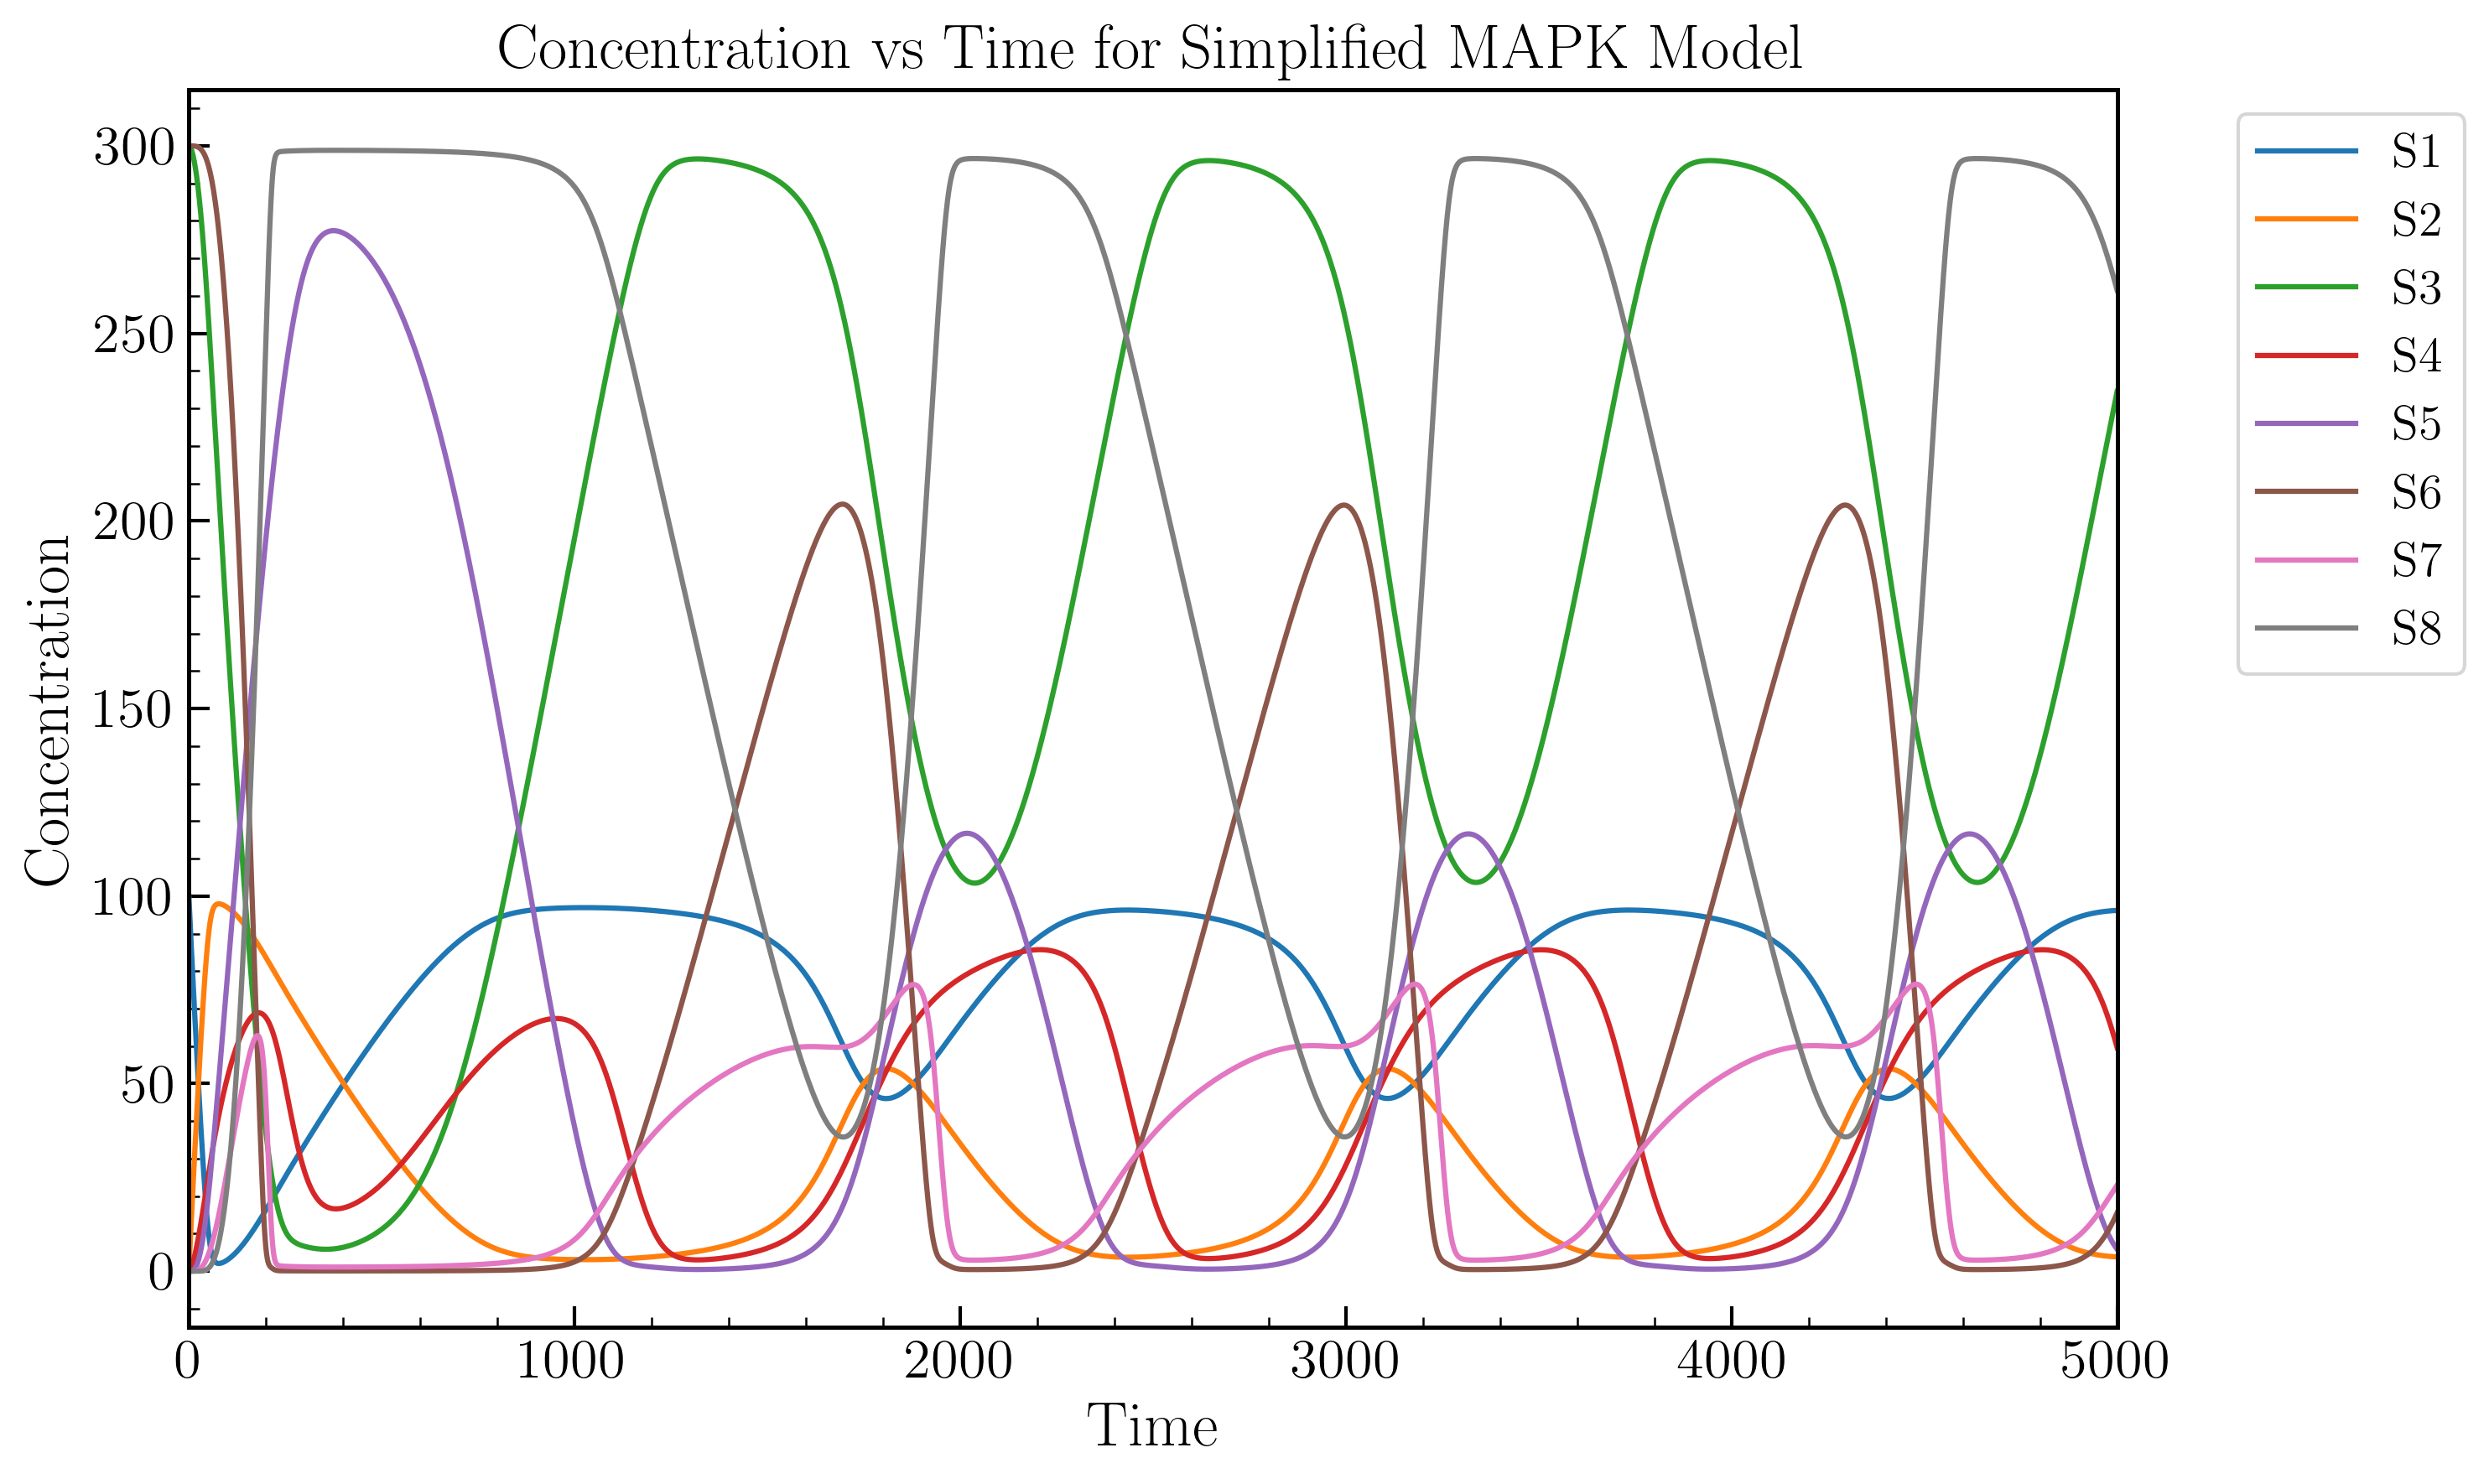

In [72]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y.T)
plt.xlim(0, 5000)
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Concentration vs Time for Simplified MAPK Model')
plt.legend([f'S{i+1}' for i in range(8)], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [73]:
# Jacobian matrix
j_matrix_mapk_simple = numdifftools.Jacobian(
    lambda y: model_mapk_simple(y, klin, kn, n1),
    method="central"
)(initial_conditions)
signed_jacobian_mapk_simple = np.sign(j_matrix_mapk_simple)
print("Signed Jacobian matrix for simplified MAPK model at initial conditions:")
print(signed_jacobian_mapk_simple)

Signed Jacobian matrix for simplified MAPK model at initial conditions:
[[-1.  1.  0.  0.  0.  0.  0.  1.]
 [ 1. -1.  0.  0.  0.  0.  0. -1.]
 [ 0. -1.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  0. -1.  1.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.  0. -1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.]]


In [75]:
# Loop detection
s_star_mapk = [initial_conditions]
res_tab_mapk_simple = ld.find_loops_vset(model_mapk_simple,
                                         vset=s_star_mapk,
                                         klin=klin,
                                         kn=kn,
                                         n1=n1,
                                         max_num_loops=50)
print(res_tab_mapk_simple['loop_rep'][0])

        loop  length  sign
0  (0, 1, 0)       2     1
1     (0, 0)       1    -1
2     (1, 1)       1    -1
3     (3, 3)       1    -1
4     (4, 4)       1    -1
5     (6, 6)       1    -1
6     (7, 7)       1    -1


In [85]:
type(res_tab_mapk_simple['loop_rep'][0])

pandas.core.frame.DataFrame

In [86]:
# Detect durations of the fluctuations

# def compute_fluctuation_durations(loop_rep, j_matrix):
#     # No library function yet, so we implement a simple version here
    
#     return durations

# durations = compute_fluctuation_durations()

## **Example 6: Calcium oscillations model**

The reactions (flows) constituting the model are given by
$$
\begin{aligned}
\nu_1 &= k_1,\\[6pt]
\nu_2 &= k_2,\\[6pt]
\nu_3 &= k_3 \cdot \frac{S_1^{n_1}}{kn_1^{\,n_1} + S_1^{n_1}},\\[10pt]
\nu_4 &= k_4 \cdot 
       \frac{S_2^{n_2}}{kn_2^{\,n_2} + S_2^{n_2}} \cdot
       \frac{S_1^{n_3}}{kn_3^{\,n_3} + S_1^{n_3}},\\[10pt]
\nu_5 &= k_5 \cdot S_2,\\[6pt]
\nu_6 &= k_6 \cdot S_1.
\end{aligned}
$$

The model is composed from these six reactions by
$$
\begin{aligned}
\frac{dS_1}{dt} &= \nu_1 + \nu_2 - \nu_3 + \nu_4 + \nu_5 - \nu_6,\\[6pt]
\frac{dS_2}{dt} &= \nu_3 - \nu_4 - \nu_5.
\end{aligned}
$$


In [15]:
def model_calcium_oscillation(y, klin, kn, n):
    S1, S2 = y
    k1, k2, k3, k4, k5, k6 = klin
    kn1, kn2, kn3 = kn
    n1, n2, n3 = n

    v1 = k1
    v2 = k2
    v3 = k3 * (S1**n1) / (kn1**n1 + S1**n1)
    v4 = k4 * (S2**n2)/(kn2**n2 + S2**n2) * (S1**n3)/(kn3**n3 + S1**n3)
    v5 = k5 * S2
    v6 = k6 * S1

    dS1 = v1 + v2 - v3 + v4 + v5 - v6
    dS2 = v3 - v4 - v5

    return np.array([dS1, dS2])

def solve_calcium_oscillation(initial_conditions, time_points, klin, kn, n):
    def model(t, x):
        return model_calcium_oscillation(x, klin, kn, n)
    sol = solve_ivp(model, [time_points[0], time_points[-1]], initial_conditions,
                    t_eval=time_points, method='RK45', rtol=1e-6)
    return sol

In [5]:
initial_conditions_calcium = [[0.3920, 1.6456]]
klin_calcium = [1, 7.3, 65, 500, 1, 10]
kn_calcium = [1, 2, 0.9]
n_calcium = [2, 2, 4]
time_points = np.linspace(0, 11, 111)

In [13]:
sol = solve_calcium_oscillation(initial_conditions=initial_conditions_calcium[0],
                                time_points=time_points,
                                klin=klin_calcium,
                                kn=kn_calcium,
                                n=n_calcium)

In [106]:
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-01 ...  1.090e+01  1.100e+01]
        y: [[ 3.920e-01  2.337e+01 ...  9.433e+01  9.433e+01]
            [ 1.646e+00  3.529e+01 ...  5.000e+02  5.000e+02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 464
     njev: 0
      nlu: 0

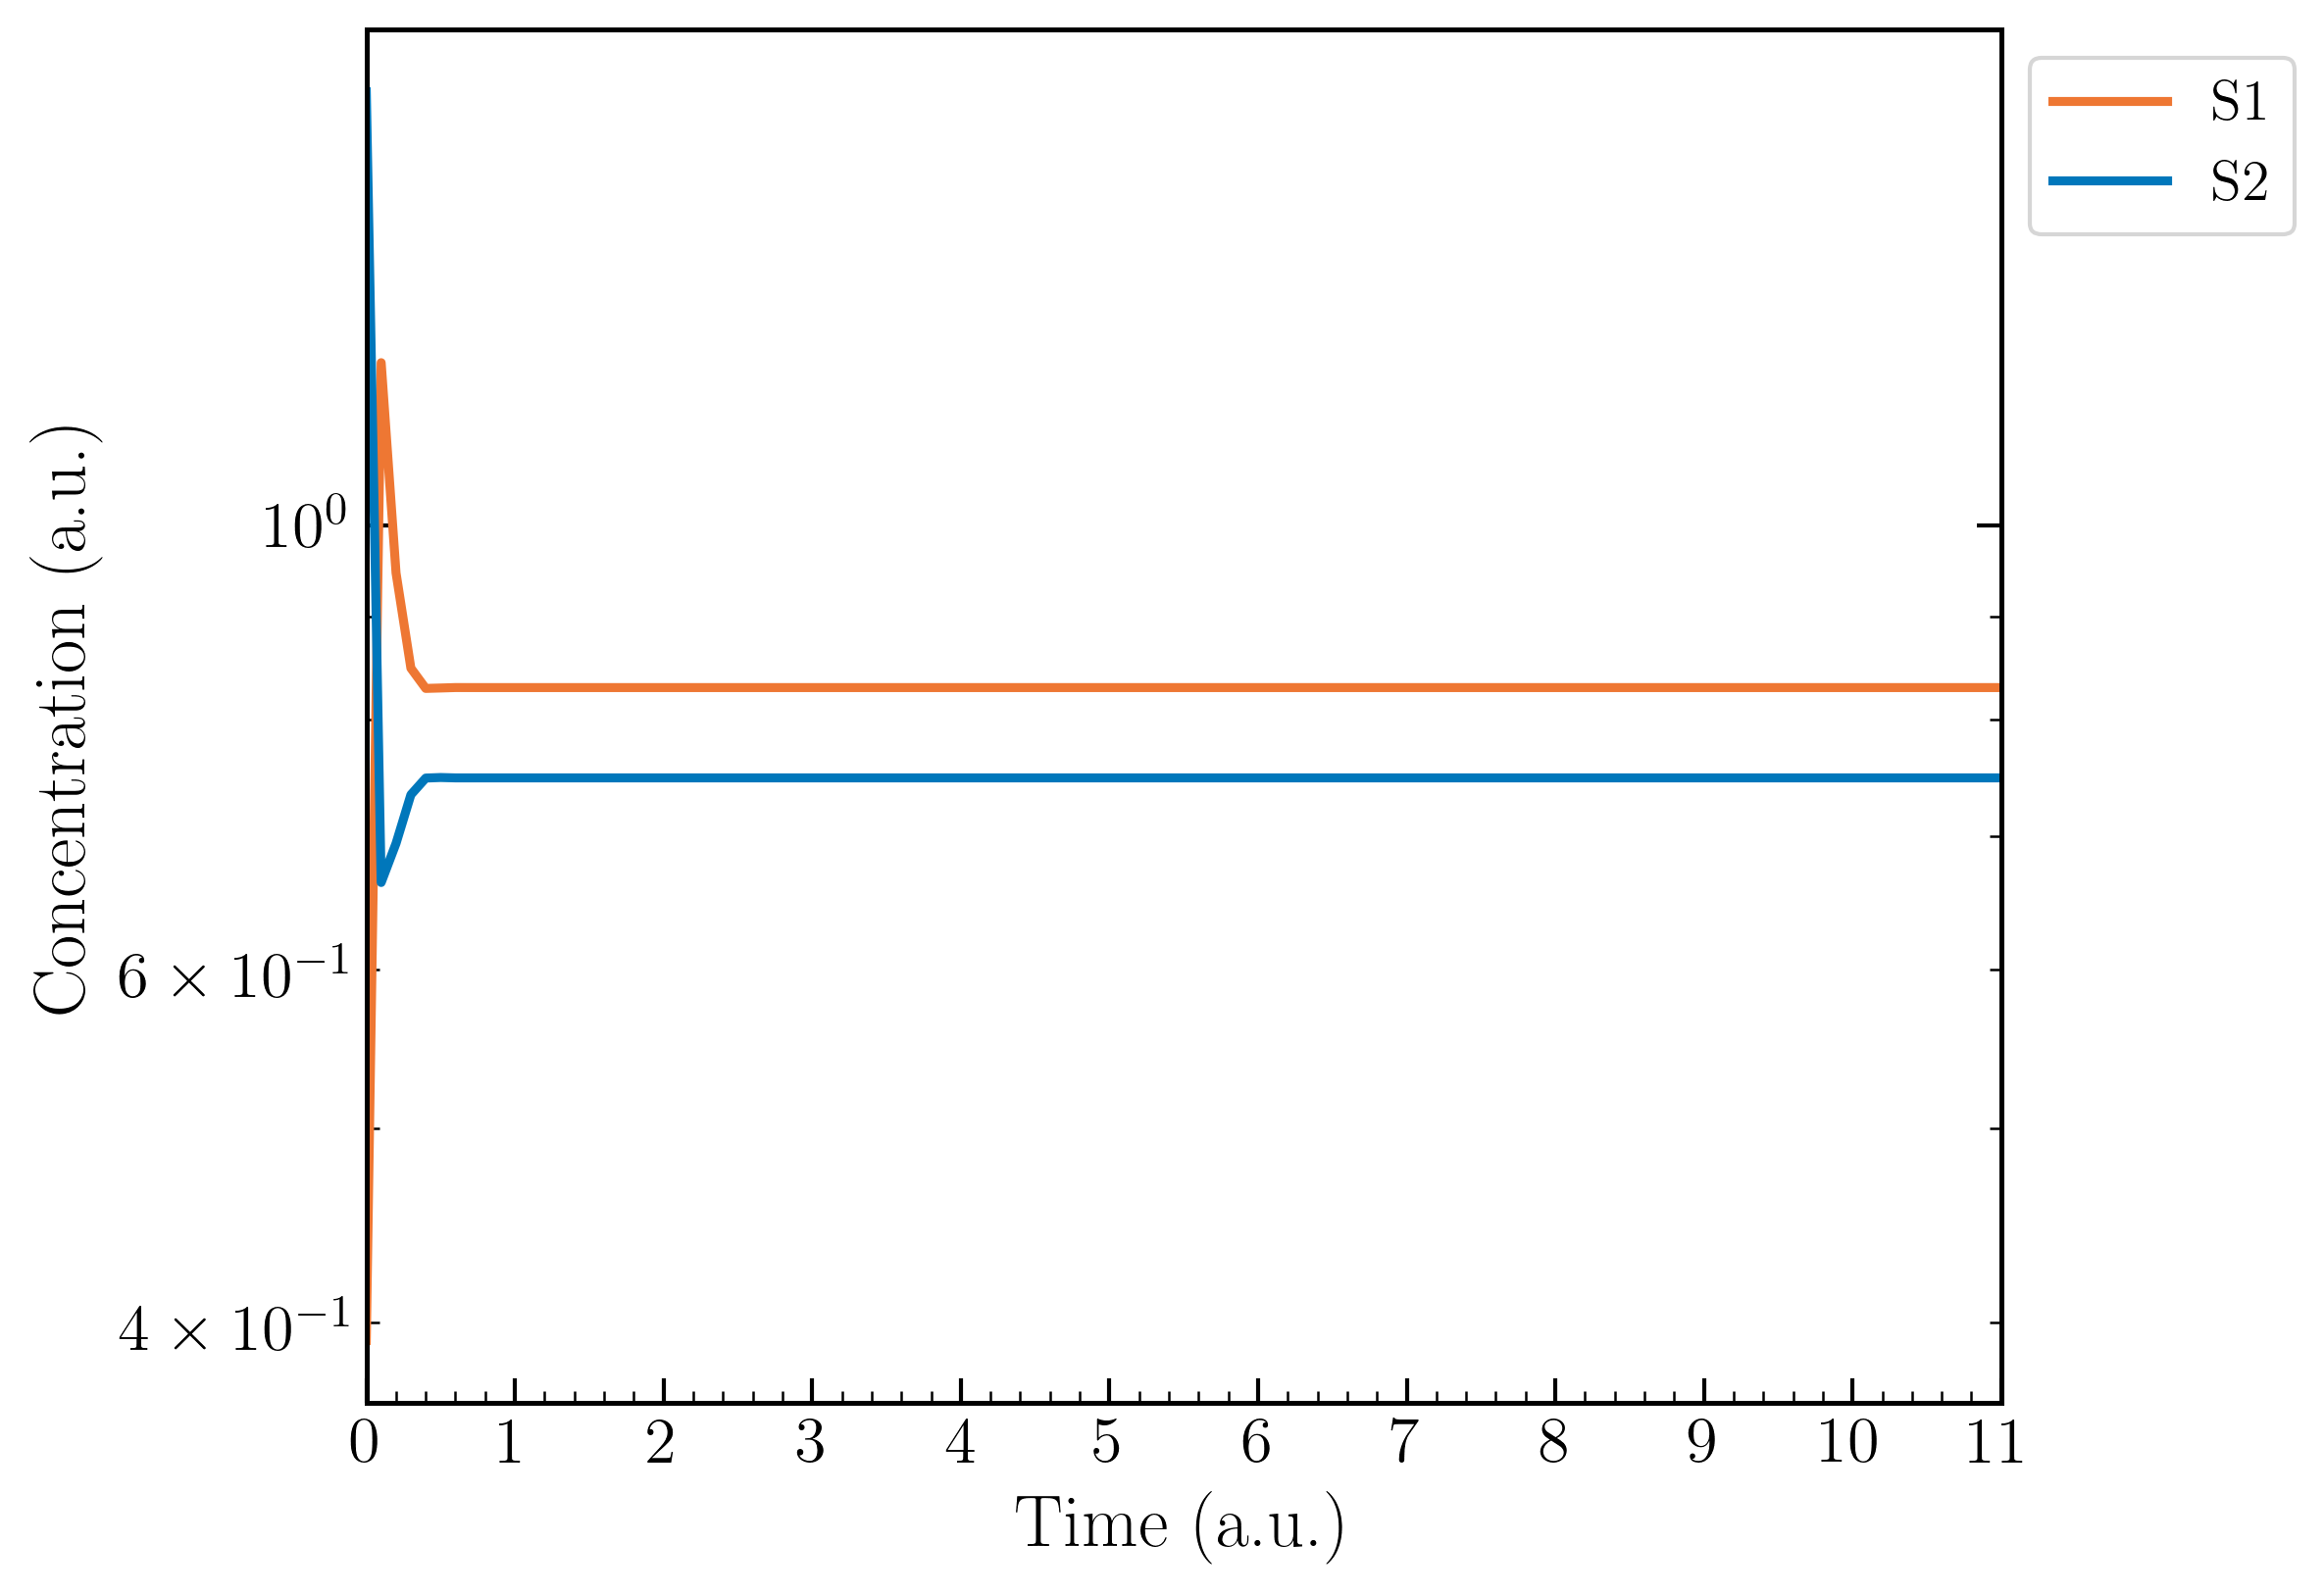

In [14]:
plt.figure(figsize=(8, 6))
for i, c in enumerate(colors[:2]):
    plt.plot(time_points, sol.y[i], lw=2.2, color=c, label=f"S{i+1}")
plt.xlabel('Time (a.u.)', weight='bold')
plt.xlim(0, 11)
plt.xticks(np.arange(0, 12, 1))
# Show tick marks in both left and right y-axes
plt.gca().yaxis.set_ticks_position('both')
plt.ylabel('Concentration (a.u.)', weight='bold')
plt.yscale('log')
# plt.title(f'Parameters: {params}')
# Make legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# plt.suptitle('Figure 2D Variations: Concentration vs Time for Old Model with Loops (fixed)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#Show in 300 dpi
plt.gcf().set_dpi(300)
plt.show()

In [16]:
# vset=[(1.0, 1.0)],
# klin=(0.5,0.3,1.0,1.5,0.2,0.1),
# kn=(0.5,0.5,0.5),
# n=(2,2,2)

res_tab = ld.find_loops_vset(model_calcium_oscillation,
                             vset=initial_conditions_calcium,
                             klin=klin_calcium,
                             kn=kn_calcium,
                             n=n_calcium,
                             max_num_loops=50)
# The loop list, a pandas dataframe, is accessed like this:
res_tab['loop_rep'][0]

,loop,length,sign
0,"(0, 1, 0)",2,-1
1,"(0, 0)",1,1
2,"(1, 1)",1,-1


In [17]:
# Jacobian matrix at the point of interest
j_matrix_calcium = numdifftools.Jacobian(model_calcium_oscillation,method="central")(
    initial_conditions_calcium[0],
    klin=klin_calcium, 
    kn=kn_calcium, 
    n=n_calcium
).real
signed_jacobian_calcium = np.sign(j_matrix_calcium)
print("Signed Jacobian matrix for calcium oscillation model at point of interest:")
print(signed_jacobian_calcium)

Signed Jacobian matrix for calcium oscillation model at point of interest:
[[ 1.  1.]
 [-1. -1.]]


## **Additional**

### *Exporting environment details to yaml file*

In [4]:
! conda env export > environment.yml